# Getting started with INTEGRATE - with no forward code

This notebook contains a simple example of getting started with INTEGRATE - with no forward code

0. Load prior data (prior models and prior data) (DAUGAARD.h5)
1. Perform probabilistic inversion using integrate_rejection.
2. Plot some results

GA-AEM is not need to run this example.



In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    # # # # #%load_ext autoreload
    # # # # #%autoreload 2
    pass

In [2]:
import integrate as ig
# check if parallel computations can be performed
parallel = ig.use_parallel(showInfo=1)
hardcopy = True 
import matplotlib.pyplot as plt

Notebook detected. Parallel processing is OK


## 0. Get some TTEM data
A number of test cases are available in the INTEGRATE package
To see which cases are available, check the `get_case_data` function

The code below will download the file DAUGAARD_AVG.h5 that contains 
a number of TTEM soundings from DAUGAARD, Denmark.
It will also download the corresponding GEX file, TX07_20231016_2x4_RC20-33.gex, 
that contains information about the TTEM system used.


In [3]:
case = 'DAUGAARD'
files = ig.get_case_data(case=case,  loadType='prior_data')
f_data_h5 = files[0]
f_prior_h5 = files[-1]
file_gex= ig.get_gex_file_from_data(f_data_h5)

print("Using data file: %s" % f_data_h5)
print("Using GEX file: %s" % file_gex)
print("Using prior model and data file: %s" % f_prior_h5)

Getting data for case: DAUGAARD
--> Got data for case: DAUGAARD
Using data file: DAUGAARD_AVG.h5
Using GEX file: TX07_20231016_2x4_RC20-33.gex
Using prior model and data file: prior_detailed_outvalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5


### Plot the geometry and the data
ig.plot_geometry plots the geometry of the data, i.e. the locations of the soundings.
ig.plot_data plots the data, i.e. the measured data for each sounding.

f_data_h5=DAUGAARD_AVG.h5


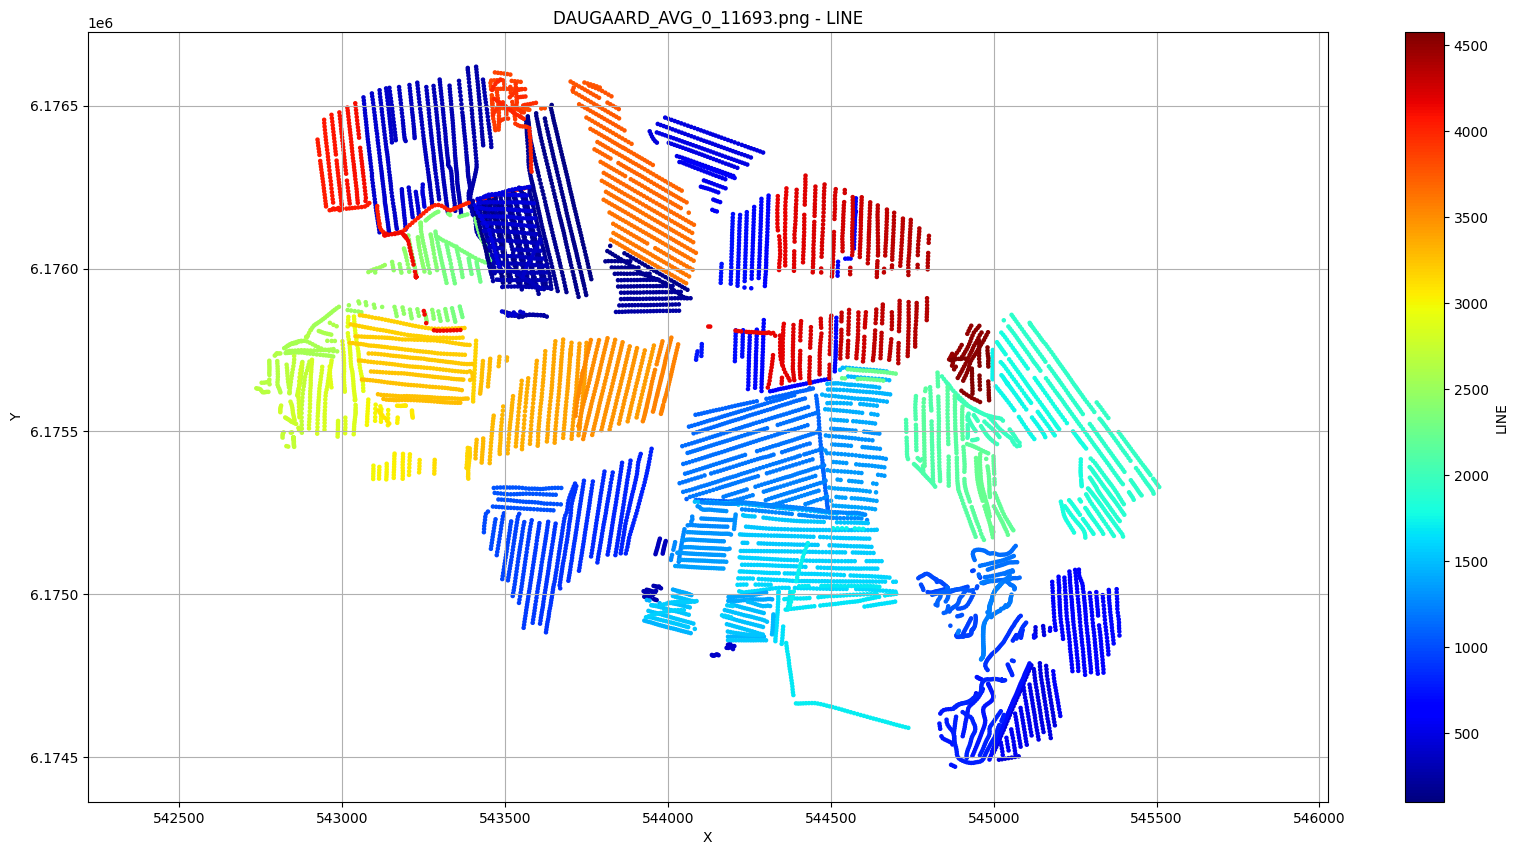

f_data_h5=DAUGAARD_AVG.h5


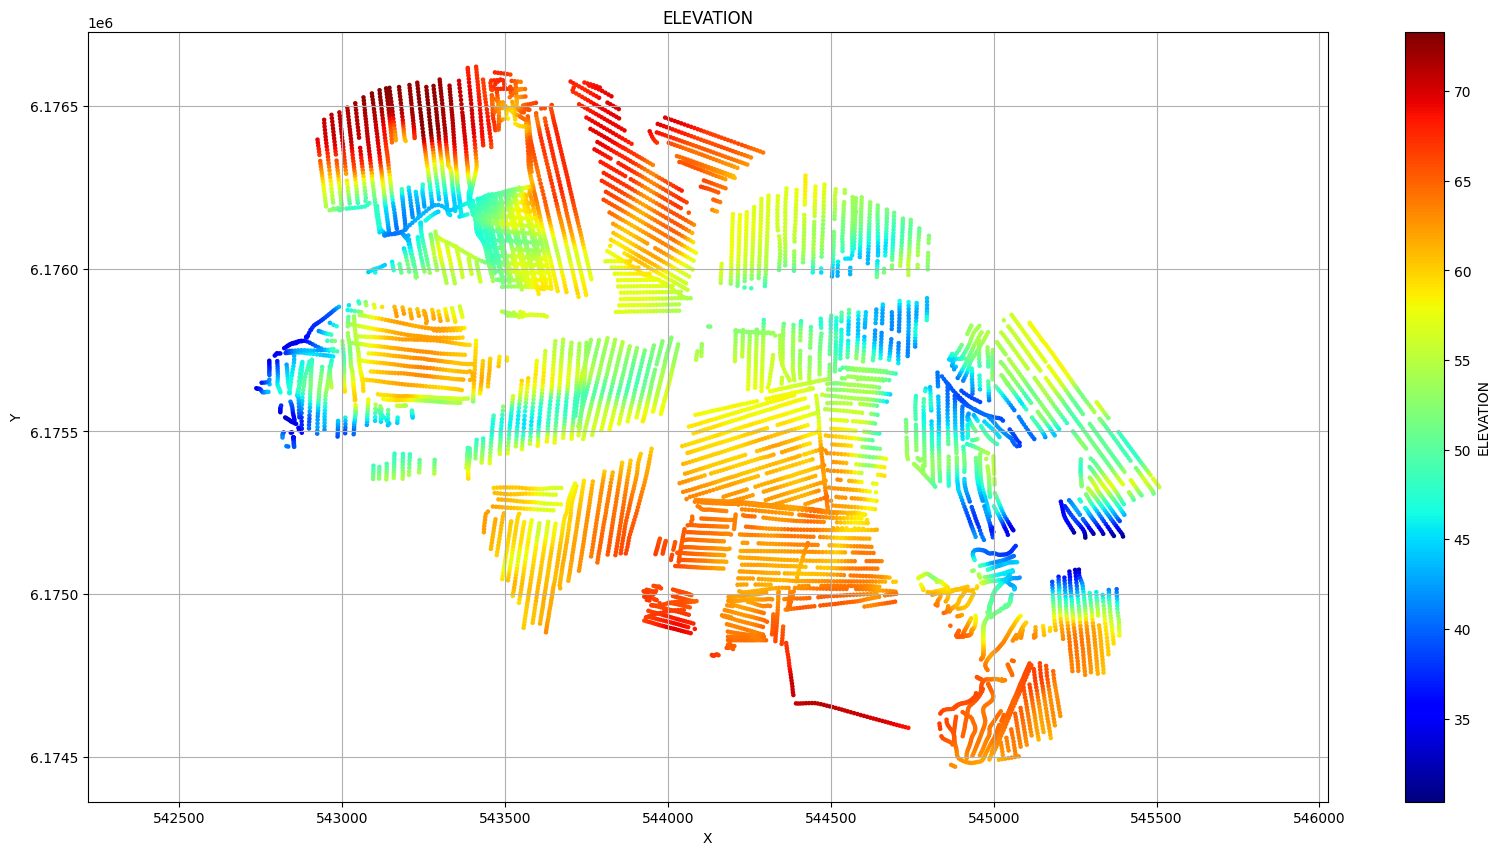

f_data_h5=DAUGAARD_AVG.h5


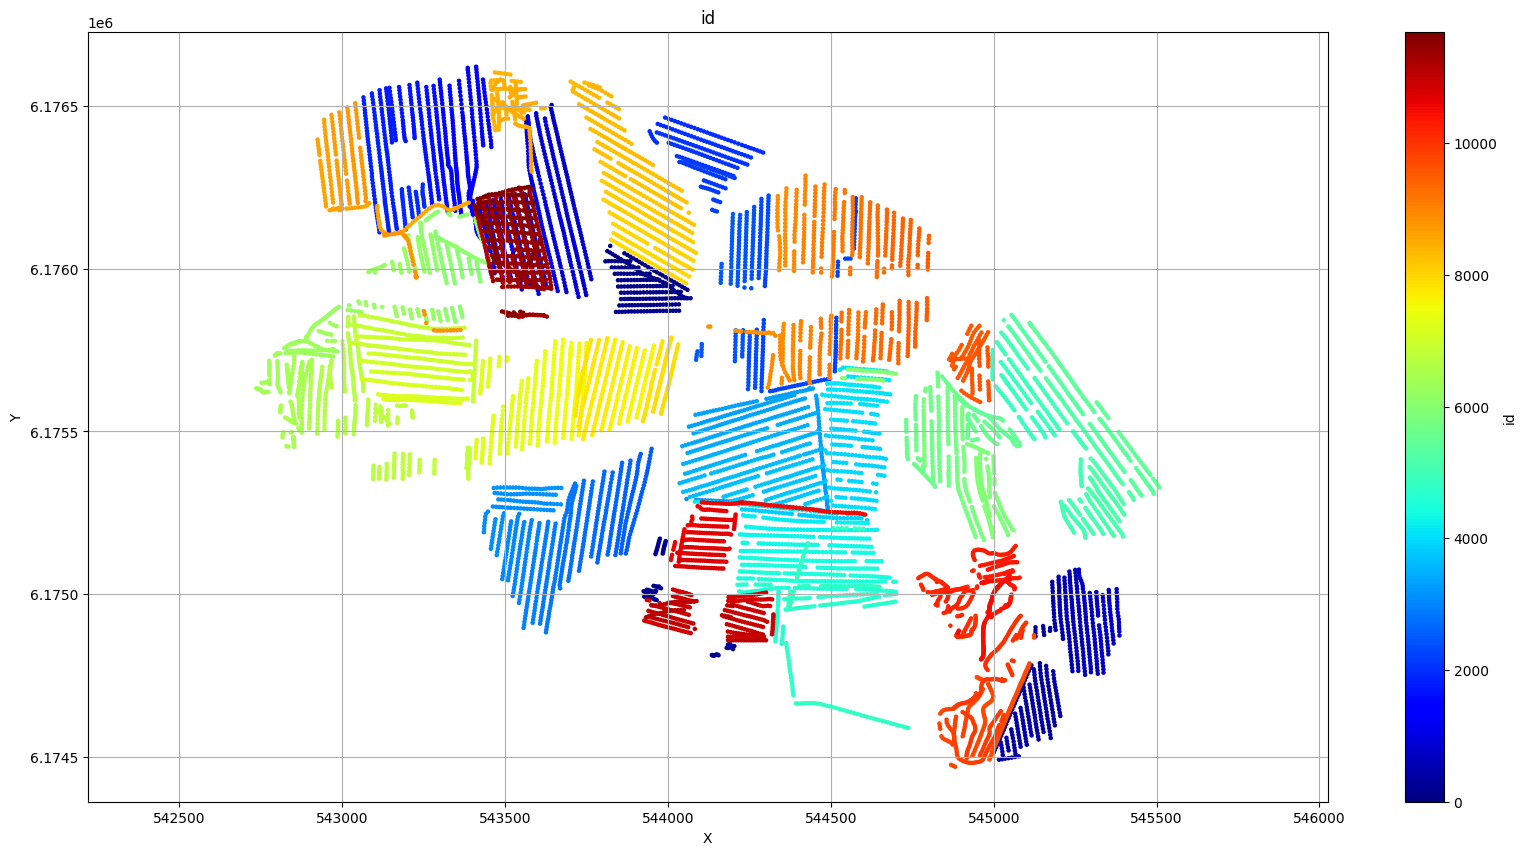

In [4]:
# The next line plots LINE, ELEVATION and data id, as three scatter plots
# ig.plot_geometry(f_data_h5)
# Each of these plots can be plotted separately by specifying the pl argument
ig.plot_geometry(f_data_h5, pl='LINE')
ig.plot_geometry(f_data_h5, pl='ELEVATION')
ig.plot_geometry(f_data_h5, pl='id')

plot_data: Found data set D1
plot_data: Using data set D1


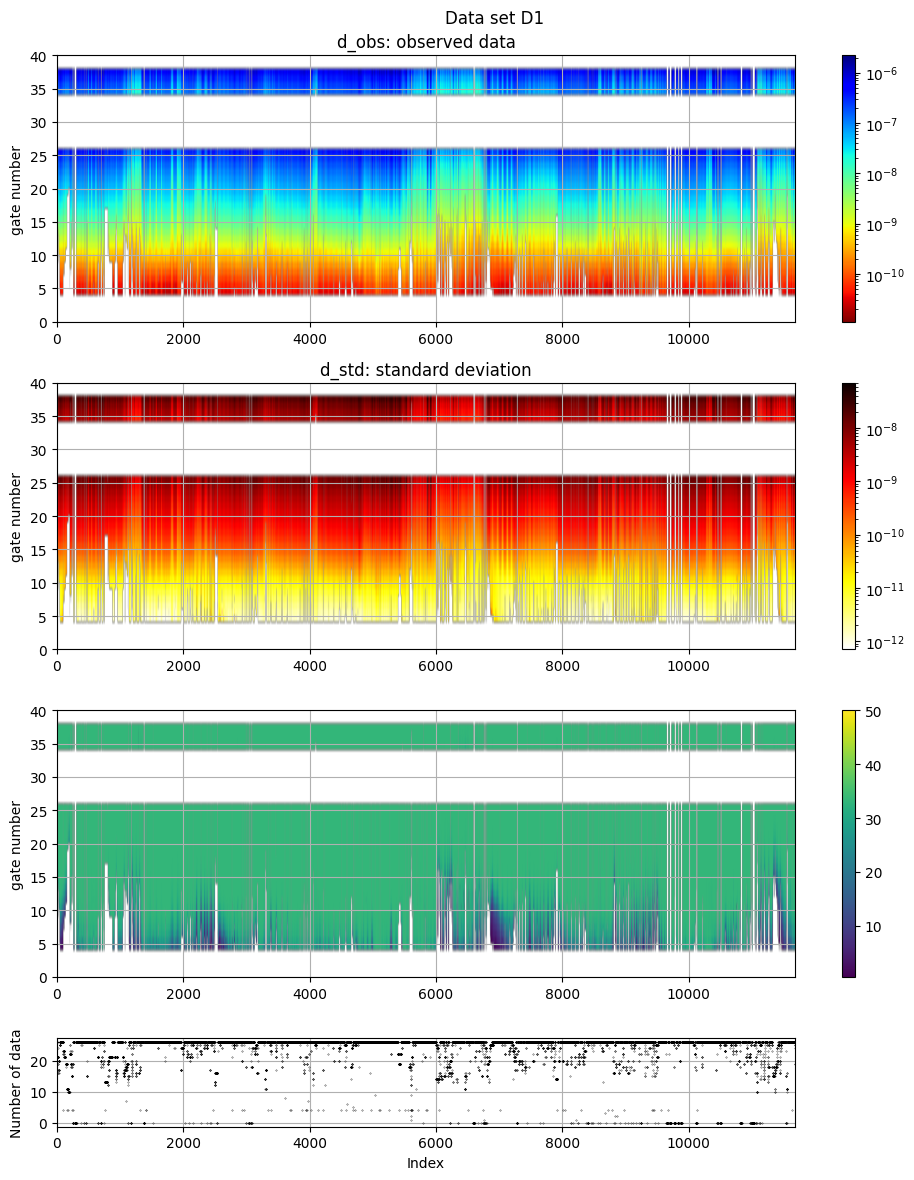

In [5]:
# The data, d_obs and d_std, can be plotted using ig.plot_data
ig.plot_data(f_data_h5, hardcopy=hardcopy)

## 1. Setup the prior model ($\rho(\mathbf{m},\mathbf{d}))

In this case prior data and models are allready available in the HDF% in 'f_prior_h5'.

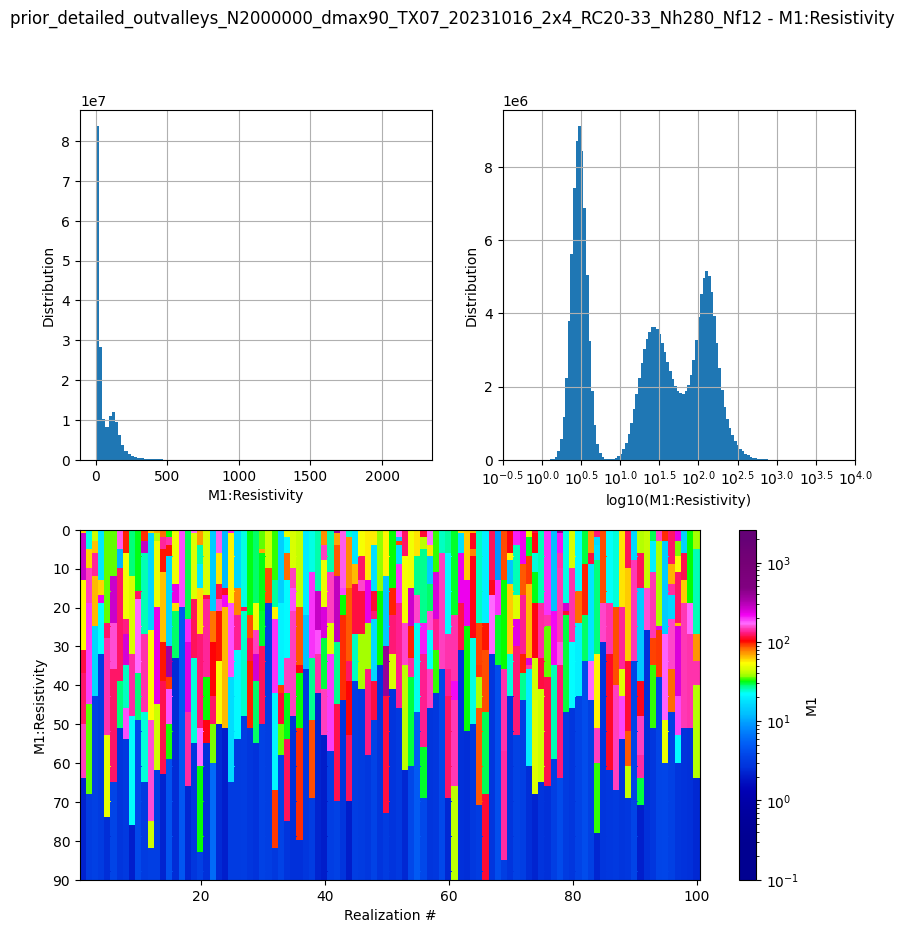

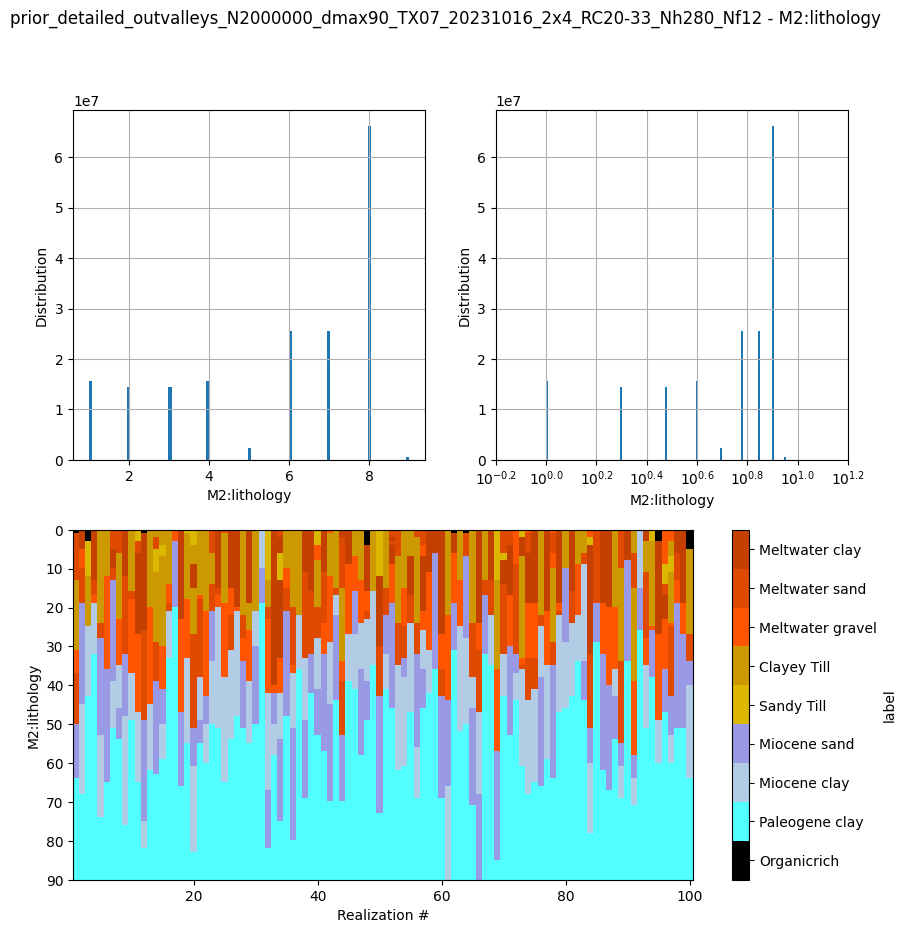

In [6]:
# Plot some summary statistics of the prior model, to QC the prior choice
ig.plot_prior_stats(f_prior_h5, hardcopy=hardcopy)

It can be useful to compare the prior data to the observed data before inversion. If there is little to no overlap of the observed data with the prior data, there is little chance that the inversion will go well. This would be an indication of inconsistency.
In the figure below, one can see that the observed data (red) is clearly within the space of the prior data.

id_data = 1


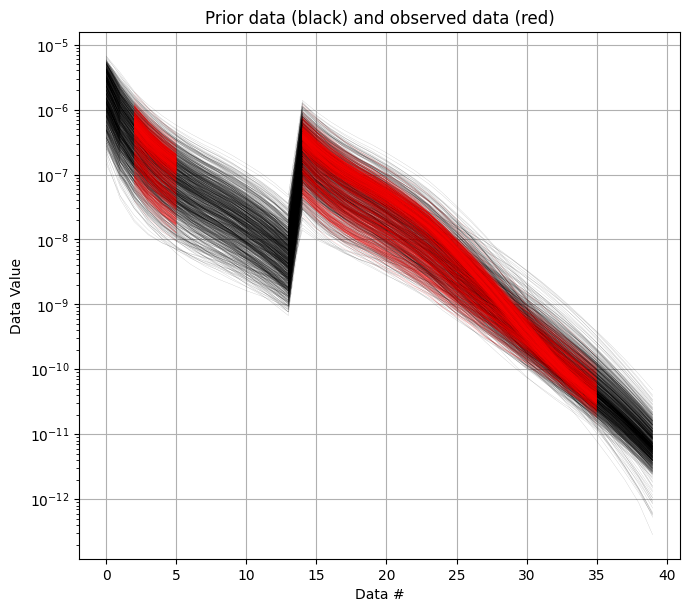

True

In [7]:
ig.plot_data_prior(f_prior_h5,f_data_h5,nr=1000,hardcopy=hardcopy)

## 2. Sample the posterior $\sigma(\mathbf{m})$

The posterior distribution is sampled using the extended rejection sampler.

In [8]:
# Rejection sampling of the posterior can be done using
#f_post_h5 = ig.integrate_rejection(f_prior_h5, f_data_h5)

# One can also control a number of options.
# One can choose to make use of only a subset of the prior data. Decreasing the sample size used makes the inversion faster, but increasingly approximate
N_use = 2000000 # Max lookup table size
N_use = 100000
T_base = 1 # The base annealing temperature. 
autoT = 1  # Automatically set the annealing temperature
f_post_h5 = ig.integrate_rejection(f_prior_h5, 
                                   f_data_h5, 
                                   f_post_h5 = 'POST.h5', 
                                   N_use = N_use, 
                                   autoT = autoT,
                                   T_base = T_base,                            
                                   showInfo=1, 
                                   parallel=parallel)

File POST.h5 allready exists
Overwriting...
Loading data from DAUGAARD_AVG.h5. Using data types: [1]
  - D1: id_use=1,    gaussian, Using 11693/40 data
Loading prior data from prior_detailed_outvalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5. Using prior data ids: [1]


  - /D1:  N,nd = 100000/40
<--INTEGRATE_REJECTION-->
f_prior_h5=prior_detailed_outvalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5, f_data_h5=DAUGAARD_AVG.h5
f_post_h5=POST.h5


rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1461 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1461 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1461 [00:00<?, ?it/s]

rejection:   1%|▎                                    | 10/1462 [00:00<01:18, 18.38it/s]

rejection:   1%|▎                                    | 10/1462 [00:00<01:22, 17.62it/s]

rejection:   1%|▎                                    | 10/1462 [00:00<01:21, 17.72it/s]

rejection:   1%|▎                                    | 10/1462 [00:00<01:24, 17.27it/s]

rejection:   1%|▎                                    | 10/1462 [00:00<01:24, 17.18it/s]

rejection:   1%|▎                                    | 10/1461 [00:00<01:24, 17.15it/s]

rejection:   1%|▎                                    | 10/1461 [00:00<01:26, 16.80it/s]

rejection:   1%|▎                                    | 10/1461 [00:00<01:30, 16.09it/s]

rejection:   1%|▌                                    | 20/1462 [00:01<01:21, 17.59it/s]

rejection:   1%|▌                                    | 20/1462 [00:01<01:25, 16.88it/s]

rejection:   1%|▌                                    | 20/1462 [00:01<01:24, 17.15it/s]

rejection:   1%|▌                                    | 20/1462 [00:01<01:23, 17.30it/s]

rejection:   1%|▌                                    | 20/1462 [00:01<01:25, 16.82it/s]

rejection:   1%|▌                                    | 20/1461 [00:01<01:24, 17.08it/s]

rejection:   1%|▌                                    | 20/1461 [00:01<01:26, 16.63it/s]

rejection:   1%|▌                                    | 20/1461 [00:01<01:25, 16.90it/s]

rejection:   2%|▊                                    | 30/1462 [00:01<01:22, 17.34it/s]

rejection:   2%|▊                                    | 30/1462 [00:01<01:23, 17.12it/s]

rejection:   2%|▊                                    | 30/1462 [00:01<01:23, 17.20it/s]

rejection:   2%|▊                                    | 30/1462 [00:01<01:25, 16.75it/s]

rejection:   2%|▊                                    | 30/1462 [00:01<01:25, 16.82it/s]

rejection:   2%|▊                                    | 30/1461 [00:01<01:23, 17.11it/s]

rejection:   2%|▊                                    | 30/1461 [00:01<01:24, 17.01it/s]

rejection:   2%|▊                                    | 30/1461 [00:01<01:25, 16.69it/s]

rejection:   3%|█                                    | 40/1462 [00:02<01:22, 17.21it/s]

rejection:   3%|█                                    | 40/1462 [00:02<01:23, 17.08it/s]

rejection:   3%|█                                    | 40/1462 [00:02<01:23, 17.05it/s]

rejection:   3%|█                                    | 40/1462 [00:02<01:23, 17.12it/s]

rejection:   3%|█                                    | 40/1462 [00:02<01:24, 16.90it/s]

rejection:   3%|█                                    | 40/1461 [00:02<01:23, 17.07it/s]

rejection:   3%|█                                    | 40/1461 [00:02<01:23, 17.05it/s]

rejection:   3%|█                                    | 40/1461 [00:02<01:23, 16.98it/s]

rejection:   3%|█▎                                   | 50/1462 [00:02<01:21, 17.25it/s]

rejection:   3%|█▎                                   | 50/1462 [00:02<01:22, 17.14it/s]

rejection:   3%|█▎                                   | 50/1462 [00:02<01:22, 17.16it/s]

rejection:   3%|█▎                                   | 50/1462 [00:02<01:22, 17.02it/s]

rejection:   3%|█▎                                   | 50/1461 [00:02<01:22, 17.13it/s]

rejection:   3%|█▎                                   | 50/1461 [00:02<01:22, 17.05it/s]

rejection:   3%|█▎                                   | 50/1461 [00:02<01:22, 17.09it/s]

rejection:   3%|█▎                                   | 50/1462 [00:03<01:28, 16.02it/s]

rejection:   4%|█▌                                   | 60/1462 [00:03<01:21, 17.14it/s]

rejection:   4%|█▌                                   | 60/1462 [00:03<01:22, 17.09it/s]

rejection:   4%|█▌                                   | 60/1462 [00:03<01:22, 17.07it/s]

rejection:   4%|█▌                                   | 60/1461 [00:03<01:22, 17.06it/s]

rejection:   4%|█▌                                   | 60/1462 [00:03<01:22, 16.99it/s]

rejection:   4%|█▌                                   | 60/1462 [00:03<01:25, 16.33it/s]

rejection:   4%|█▌                                   | 60/1461 [00:03<01:22, 17.00it/s]

rejection:   4%|█▌                                   | 60/1461 [00:03<01:22, 17.03it/s]

rejection:   5%|█▊                                   | 70/1462 [00:04<01:21, 17.11it/s]

rejection:   5%|█▊                                   | 70/1462 [00:04<01:21, 17.09it/s]

rejection:   5%|█▊                                   | 70/1462 [00:04<01:21, 17.05it/s]

rejection:   5%|█▊                                   | 70/1461 [00:04<01:21, 17.08it/s]

rejection:   5%|█▊                                   | 70/1462 [00:04<01:21, 17.02it/s]

rejection:   5%|█▊                                   | 70/1461 [00:04<01:21, 17.04it/s]

rejection:   5%|█▊                                   | 70/1462 [00:04<01:24, 16.57it/s]

rejection:   5%|█▊                                   | 70/1461 [00:04<01:22, 16.89it/s]

rejection:   5%|██                                   | 80/1462 [00:04<01:20, 17.10it/s]

rejection:   5%|██                                   | 80/1462 [00:04<01:20, 17.07it/s]

rejection:   5%|██                                   | 80/1462 [00:04<01:20, 17.07it/s]

rejection:   5%|██                                   | 80/1461 [00:04<01:20, 17.06it/s]

rejection:   5%|██                                   | 80/1462 [00:04<01:21, 17.03it/s]

rejection:   5%|██                                   | 80/1462 [00:04<01:22, 16.72it/s]

rejection:   5%|██                                   | 80/1461 [00:04<01:20, 17.09it/s]

rejection:   5%|██                                   | 80/1461 [00:04<01:21, 17.03it/s]

rejection:   6%|██▎                                  | 90/1462 [00:05<01:20, 17.13it/s]

rejection:   6%|██▎                                  | 90/1462 [00:05<01:20, 17.12it/s]

rejection:   6%|██▎                                  | 90/1462 [00:05<01:20, 17.11it/s]

rejection:   6%|██▎                                  | 90/1461 [00:05<01:20, 17.13it/s]

rejection:   6%|██▎                                  | 90/1462 [00:05<01:20, 17.11it/s]

rejection:   6%|██▎                                  | 90/1462 [00:05<01:21, 16.90it/s]

rejection:   6%|██▎                                  | 90/1461 [00:05<01:19, 17.17it/s]

rejection:   6%|██▎                                  | 90/1461 [00:05<01:22, 16.65it/s]

rejection:   7%|██▍                                 | 100/1462 [00:05<01:19, 17.18it/s]

rejection:   7%|██▍                                 | 100/1462 [00:05<01:19, 17.17it/s]

rejection:   7%|██▍                                 | 100/1462 [00:05<01:21, 16.68it/s]

rejection:   7%|██▍                                 | 100/1462 [00:05<01:19, 17.16it/s]

rejection:   7%|██▍                                 | 100/1461 [00:05<01:19, 17.17it/s]

rejection:   7%|██▍                                 | 100/1462 [00:05<01:20, 17.00it/s]

rejection:   7%|██▍                                 | 100/1461 [00:05<01:19, 17.19it/s]

rejection:   7%|██▍                                 | 100/1461 [00:05<01:21, 16.78it/s]

rejection:   8%|██▋                                 | 110/1462 [00:06<01:18, 17.19it/s]

rejection:   8%|██▋                                 | 110/1462 [00:06<01:18, 17.19it/s]

rejection:   8%|██▋                                 | 110/1462 [00:06<01:21, 16.51it/s]

rejection:   8%|██▋                                 | 110/1462 [00:06<01:18, 17.18it/s]

rejection:   8%|██▋                                 | 110/1461 [00:06<01:18, 17.19it/s]

rejection:   8%|██▋                                 | 110/1461 [00:06<01:18, 17.24it/s]

rejection:   8%|██▋                                 | 110/1462 [00:06<01:19, 17.10it/s]

rejection:   8%|██▋                                 | 110/1461 [00:06<01:19, 16.95it/s]

rejection:   8%|██▉                                 | 120/1462 [00:07<01:18, 17.19it/s]

rejection:   8%|██▉                                 | 120/1462 [00:07<01:19, 16.98it/s]

rejection:   8%|██▉                                 | 120/1462 [00:07<01:18, 17.18it/s]

rejection:   8%|██▉                                 | 120/1461 [00:07<01:18, 17.18it/s]

rejection:   8%|██▉                                 | 120/1462 [00:07<01:21, 16.54it/s]

rejection:   8%|██▉                                 | 120/1461 [00:07<01:18, 17.19it/s]

rejection:   8%|██▉                                 | 120/1462 [00:07<01:18, 17.09it/s]

rejection:   8%|██▉                                 | 120/1461 [00:07<01:18, 16.99it/s]

rejection:   9%|███▏                                | 130/1462 [00:07<01:17, 17.13it/s]

rejection:   9%|███▏                                | 130/1462 [00:07<01:18, 16.95it/s]

rejection:   9%|███▏                                | 130/1462 [00:07<01:17, 17.13it/s]

rejection:   9%|███▏                                | 130/1461 [00:07<01:17, 17.13it/s]

rejection:   9%|███▏                                | 130/1462 [00:07<01:19, 16.68it/s]

rejection:   9%|███▏                                | 130/1462 [00:07<01:18, 17.07it/s]

rejection:   9%|███▏                                | 130/1461 [00:07<01:17, 17.13it/s]

rejection:   9%|███▏                                | 130/1461 [00:07<01:18, 16.98it/s]

rejection:  10%|███▍                                | 140/1462 [00:08<01:17, 17.11it/s]

rejection:  10%|███▍                                | 140/1462 [00:08<01:18, 16.78it/s]

rejection:  10%|███▍                                | 140/1461 [00:08<01:17, 17.11it/s]

rejection:  10%|███▍                                | 140/1462 [00:08<01:17, 17.10it/s]

rejection:  10%|███▍                                | 140/1462 [00:08<01:18, 16.79it/s]

rejection:  10%|███▍                                | 140/1461 [00:08<01:17, 17.12it/s]

rejection:  10%|███▍                                | 140/1462 [00:08<01:17, 17.07it/s]

rejection:  10%|███▍                                | 140/1461 [00:08<01:17, 17.02it/s]

rejection:  10%|███▋                                | 150/1462 [00:08<01:16, 17.08it/s]

rejection:  10%|███▋                                | 150/1462 [00:08<01:18, 16.81it/s]

rejection:  10%|███▋                                | 150/1461 [00:08<01:16, 17.08it/s]

rejection:  10%|███▋                                | 150/1462 [00:08<01:16, 17.07it/s]

rejection:  10%|███▋                                | 150/1462 [00:08<01:17, 16.86it/s]

rejection:  10%|███▋                                | 150/1461 [00:08<01:16, 17.07it/s]

rejection:  10%|███▋                                | 150/1462 [00:08<01:17, 17.04it/s]

rejection:  10%|███▋                                | 150/1461 [00:08<01:17, 17.02it/s]

rejection:  11%|███▉                                | 160/1462 [00:09<01:16, 17.10it/s]

rejection:  11%|███▉                                | 160/1462 [00:09<01:16, 17.10it/s]

rejection:  11%|███▉                                | 160/1461 [00:09<01:16, 17.10it/s]

rejection:  11%|███▉                                | 160/1462 [00:09<01:17, 16.88it/s]

rejection:  11%|███▉                                | 160/1462 [00:09<01:16, 16.93it/s]

rejection:  11%|███▉                                | 160/1461 [00:09<01:16, 17.09it/s]

rejection:  11%|███▉                                | 160/1462 [00:09<01:17, 16.73it/s]

rejection:  11%|███▉                                | 160/1461 [00:09<01:16, 17.05it/s]

rejection:  12%|████▏                               | 170/1462 [00:09<01:15, 17.08it/s]

rejection:  12%|████▏                               | 170/1462 [00:09<01:16, 16.94it/s]

rejection:  12%|████▏                               | 170/1462 [00:09<01:15, 17.06it/s]

rejection:  12%|████▏                               | 170/1462 [00:10<01:16, 16.96it/s]

rejection:  12%|████▏                               | 170/1461 [00:09<01:15, 17.07it/s]

rejection:  12%|████▏                               | 170/1461 [00:09<01:15, 17.06it/s]

rejection:  12%|████▏                               | 170/1461 [00:10<01:15, 17.02it/s]

rejection:  12%|████▏                               | 170/1462 [00:10<01:17, 16.64it/s]

rejection:  12%|████▍                               | 180/1462 [00:10<01:15, 17.02it/s]

rejection:  12%|████▍                               | 180/1462 [00:10<01:15, 17.01it/s]

rejection:  12%|████▍                               | 180/1461 [00:10<01:15, 17.01it/s]

rejection:  12%|████▍                               | 180/1462 [00:10<01:15, 16.90it/s]

rejection:  12%|████▍                               | 180/1462 [00:10<01:15, 16.94it/s]

rejection:  12%|████▍                               | 180/1461 [00:10<01:15, 17.01it/s]

rejection:  12%|████▍                               | 180/1461 [00:10<01:15, 16.98it/s]

rejection:  12%|████▍                               | 180/1462 [00:10<01:16, 16.71it/s]

rejection:  13%|████▋                               | 190/1462 [00:11<01:14, 16.98it/s]

rejection:  13%|████▋                               | 190/1461 [00:11<01:14, 17.00it/s]

rejection:  13%|████▋                               | 190/1462 [00:11<01:14, 16.99it/s]

rejection:  13%|████▋                               | 190/1462 [00:11<01:15, 16.95it/s]

rejection:  13%|████▋                               | 190/1462 [00:11<01:15, 16.92it/s]

rejection:  13%|████▋                               | 190/1461 [00:11<01:14, 16.99it/s]

rejection:  13%|████▋                               | 190/1462 [00:11<01:15, 16.79it/s]

rejection:  13%|████▋                               | 190/1461 [00:11<01:16, 16.72it/s]

rejection:  14%|████▉                               | 200/1462 [00:11<01:14, 17.00it/s]

rejection:  14%|████▉                               | 200/1461 [00:11<01:14, 17.00it/s]

rejection:  14%|████▉                               | 200/1462 [00:11<01:14, 16.94it/s]

rejection:  14%|████▉                               | 200/1462 [00:11<01:14, 16.99it/s]

rejection:  14%|████▉                               | 200/1462 [00:11<01:14, 16.96it/s]

rejection:  14%|████▉                               | 200/1461 [00:11<01:14, 16.99it/s]

rejection:  14%|████▉                               | 200/1462 [00:11<01:14, 16.85it/s]

rejection:  14%|████▉                               | 200/1461 [00:11<01:16, 16.56it/s]

rejection:  14%|█████▏                              | 210/1462 [00:12<01:13, 16.99it/s]

rejection:  14%|█████▏                              | 210/1462 [00:12<01:13, 16.99it/s]

rejection:  14%|█████▏                              | 210/1461 [00:12<01:13, 16.99it/s]

rejection:  14%|█████▏                              | 210/1462 [00:12<01:13, 16.95it/s]

rejection:  14%|█████▏                              | 210/1462 [00:12<01:13, 16.96it/s]

rejection:  14%|█████▏                              | 210/1461 [00:12<01:13, 16.98it/s]

rejection:  14%|█████▏                              | 210/1462 [00:12<01:14, 16.88it/s]

rejection:  14%|█████▏                              | 210/1461 [00:12<01:15, 16.66it/s]

rejection:  15%|█████▍                              | 220/1462 [00:12<01:13, 16.96it/s]

rejection:  15%|█████▍                              | 220/1462 [00:12<01:13, 16.96it/s]

rejection:  15%|█████▍                              | 220/1461 [00:12<01:13, 16.96it/s]

rejection:  15%|█████▍                              | 220/1462 [00:12<01:13, 16.94it/s]

rejection:  15%|█████▍                              | 220/1462 [00:12<01:13, 16.94it/s]

rejection:  15%|█████▍                              | 220/1461 [00:12<01:13, 16.96it/s]

rejection:  15%|█████▍                              | 220/1462 [00:13<01:13, 16.89it/s]

rejection:  15%|█████▍                              | 220/1461 [00:13<01:14, 16.76it/s]

rejection:  16%|█████▋                              | 230/1462 [00:13<01:12, 16.97it/s]

rejection:  16%|█████▋                              | 230/1462 [00:13<01:12, 16.97it/s]

rejection:  16%|█████▋                              | 230/1462 [00:13<01:12, 16.96it/s]

rejection:  16%|█████▋                              | 230/1461 [00:13<01:12, 16.97it/s]

rejection:  16%|█████▋                              | 230/1462 [00:13<01:12, 16.96it/s]

rejection:  16%|█████▋                              | 230/1461 [00:13<01:12, 17.04it/s]

rejection:  16%|█████▋                              | 230/1462 [00:13<01:12, 16.94it/s]

rejection:  16%|█████▋                              | 230/1461 [00:13<01:13, 16.83it/s]

rejection:  16%|█████▉                              | 240/1462 [00:14<01:11, 17.01it/s]

rejection:  16%|█████▉                              | 240/1462 [00:14<01:11, 17.00it/s]

rejection:  16%|█████▉                              | 240/1461 [00:14<01:11, 17.01it/s]

rejection:  16%|█████▉                              | 240/1462 [00:14<01:11, 16.99it/s]

rejection:  16%|█████▉                              | 240/1462 [00:14<01:11, 17.00it/s]

rejection:  16%|█████▉                              | 240/1461 [00:14<01:11, 17.00it/s]

rejection:  16%|█████▉                              | 240/1462 [00:14<01:11, 16.98it/s]

rejection:  16%|█████▉                              | 240/1461 [00:14<01:13, 16.61it/s]

rejection:  17%|██████▏                             | 250/1462 [00:14<01:11, 17.05it/s]

rejection:  17%|██████▏                             | 250/1462 [00:14<01:11, 17.03it/s]

rejection:  17%|██████▏                             | 250/1462 [00:14<01:11, 17.05it/s]

rejection:  17%|██████▏                             | 250/1461 [00:14<01:11, 17.05it/s]

rejection:  17%|██████▏                             | 250/1462 [00:14<01:11, 17.04it/s]

rejection:  17%|██████▏                             | 250/1461 [00:14<01:11, 17.02it/s]

rejection:  17%|██████▏                             | 250/1462 [00:14<01:11, 17.01it/s]

rejection:  17%|██████▏                             | 250/1461 [00:14<01:13, 16.55it/s]

rejection:  18%|██████▍                             | 260/1462 [00:15<01:10, 17.02it/s]

rejection:  18%|██████▍                             | 260/1462 [00:15<01:10, 17.03it/s]

rejection:  18%|██████▍                             | 260/1461 [00:15<01:10, 17.03it/s]

rejection:  18%|██████▍                             | 260/1462 [00:15<01:10, 17.02it/s]

rejection:  18%|██████▍                             | 260/1462 [00:15<01:10, 17.02it/s]

rejection:  18%|██████▍                             | 260/1461 [00:15<01:10, 17.02it/s]

rejection:  18%|██████▍                             | 260/1462 [00:15<01:10, 17.01it/s]

rejection:  18%|██████▍                             | 260/1461 [00:15<01:11, 16.68it/s]

rejection:  18%|██████▋                             | 270/1462 [00:15<01:10, 17.01it/s]

rejection:  18%|██████▋                             | 270/1462 [00:15<01:10, 17.02it/s]

rejection:  18%|██████▋                             | 270/1462 [00:15<01:10, 17.02it/s]

rejection:  18%|██████▋                             | 270/1461 [00:15<01:10, 17.01it/s]

rejection:  18%|██████▋                             | 270/1462 [00:15<01:10, 17.01it/s]

rejection:  18%|██████▋                             | 270/1461 [00:15<01:09, 17.01it/s]

rejection:  18%|██████▋                             | 270/1462 [00:15<01:10, 17.00it/s]

rejection:  18%|██████▋                             | 270/1461 [00:16<01:11, 16.77it/s]

rejection:  19%|██████▉                             | 280/1462 [00:16<01:09, 17.01it/s]

rejection:  19%|██████▉                             | 280/1462 [00:16<01:09, 17.03it/s]

rejection:  19%|██████▉                             | 280/1462 [00:16<01:09, 17.00it/s]

rejection:  19%|██████▉                             | 280/1461 [00:16<01:09, 17.00it/s]

rejection:  19%|██████▉                             | 280/1462 [00:16<01:09, 17.00it/s]

rejection:  19%|██████▉                             | 280/1461 [00:16<01:08, 17.13it/s]

rejection:  19%|██████▉                             | 280/1462 [00:16<01:10, 16.67it/s]

rejection:  19%|██████▉                             | 280/1461 [00:16<01:09, 16.88it/s]

rejection:  20%|███████▏                            | 290/1462 [00:17<01:08, 17.06it/s]

rejection:  20%|███████▏                            | 290/1462 [00:17<01:08, 17.17it/s]

rejection:  20%|███████▏                            | 290/1461 [00:16<01:08, 17.07it/s]

rejection:  20%|███████▏                            | 290/1462 [00:17<01:08, 17.07it/s]

rejection:  20%|███████▏                            | 290/1462 [00:17<01:08, 17.07it/s]

rejection:  20%|███████▏                            | 290/1461 [00:17<01:08, 17.03it/s]

rejection:  20%|███████▏                            | 290/1462 [00:17<01:10, 16.67it/s]

rejection:  20%|███████▏                            | 290/1461 [00:17<01:09, 16.95it/s]

rejection:  21%|███████▍                            | 300/1462 [00:17<01:08, 17.07it/s]

rejection:  21%|███████▍                            | 300/1462 [00:17<01:07, 17.15it/s]

rejection:  21%|███████▍                            | 300/1461 [00:17<01:07, 17.08it/s]

rejection:  21%|███████▍                            | 300/1462 [00:17<01:08, 17.08it/s]

rejection:  21%|███████▍                            | 300/1462 [00:17<01:08, 17.08it/s]

rejection:  21%|███████▍                            | 300/1461 [00:17<01:08, 17.05it/s]

rejection:  21%|███████▍                            | 300/1462 [00:17<01:09, 16.79it/s]

rejection:  21%|███████▍                            | 300/1461 [00:17<01:08, 16.99it/s]

rejection:  21%|███████▋                            | 310/1462 [00:18<01:07, 17.11it/s]

rejection:  21%|███████▋                            | 310/1462 [00:18<01:07, 17.06it/s]

rejection:  21%|███████▋                            | 310/1462 [00:18<01:07, 17.10it/s]

rejection:  21%|███████▋                            | 310/1461 [00:18<01:07, 17.10it/s]

rejection:  21%|███████▋                            | 310/1462 [00:18<01:07, 17.09it/s]

rejection:  21%|███████▋                            | 310/1461 [00:18<01:07, 17.08it/s]

rejection:  21%|███████▋                            | 310/1462 [00:18<01:08, 16.89it/s]

rejection:  21%|███████▋                            | 310/1461 [00:18<01:07, 17.03it/s]

rejection:  22%|███████▉                            | 320/1462 [00:18<01:06, 17.07it/s]

rejection:  22%|███████▉                            | 320/1461 [00:18<01:06, 17.06it/s]

rejection:  22%|███████▉                            | 320/1462 [00:18<01:06, 17.06it/s]

rejection:  22%|███████▉                            | 320/1462 [00:18<01:06, 17.06it/s]

rejection:  22%|███████▉                            | 320/1462 [00:18<01:07, 17.02it/s]

rejection:  22%|███████▉                            | 320/1461 [00:18<01:06, 17.04it/s]

rejection:  22%|███████▉                            | 320/1462 [00:18<01:07, 16.92it/s]

rejection:  22%|███████▉                            | 320/1461 [00:18<01:07, 17.03it/s]

rejection:  23%|████████▏                           | 330/1462 [00:19<01:06, 17.03it/s]

rejection:  23%|████████▏                           | 330/1461 [00:19<01:06, 17.03it/s]

rejection:  23%|████████▏                           | 330/1462 [00:19<01:06, 17.03it/s]

rejection:  23%|████████▏                           | 330/1462 [00:19<01:06, 17.03it/s]

rejection:  23%|████████▏                           | 330/1462 [00:19<01:06, 17.00it/s]

rejection:  23%|████████▏                           | 330/1461 [00:19<01:06, 17.03it/s]

rejection:  23%|████████▏                           | 330/1462 [00:19<01:06, 16.96it/s]

rejection:  23%|████████▏                           | 330/1461 [00:19<01:06, 17.03it/s]

rejection:  23%|████████▎                           | 340/1462 [00:19<01:05, 17.02it/s]

rejection:  23%|████████▎                           | 340/1462 [00:19<01:05, 17.05it/s]

rejection:  23%|████████▍                           | 340/1461 [00:19<01:05, 17.04it/s]

rejection:  23%|████████▎                           | 340/1462 [00:20<01:05, 17.02it/s]

rejection:  23%|████████▎                           | 340/1462 [00:19<01:05, 17.04it/s]

rejection:  23%|████████▍                           | 340/1461 [00:19<01:05, 17.03it/s]

rejection:  23%|████████▎                           | 340/1462 [00:20<01:06, 16.95it/s]

rejection:  23%|████████▍                           | 340/1461 [00:20<01:05, 17.00it/s]

rejection:  24%|████████▌                           | 350/1461 [00:20<01:05, 16.96it/s]

rejection:  24%|████████▌                           | 350/1462 [00:20<01:05, 16.96it/s]

rejection:  24%|████████▌                           | 350/1462 [00:20<01:07, 16.47it/s]

rejection:  24%|████████▌                           | 350/1462 [00:20<01:05, 16.96it/s]

rejection:  24%|████████▌                           | 350/1462 [00:20<01:05, 16.94it/s]

rejection:  24%|████████▌                           | 350/1461 [00:20<01:05, 16.95it/s]

rejection:  24%|████████▌                           | 350/1462 [00:20<01:05, 16.88it/s]

rejection:  24%|████████▌                           | 350/1461 [00:20<01:05, 16.95it/s]

rejection:  25%|████████▊                           | 360/1462 [00:21<01:06, 16.63it/s]

rejection:  25%|████████▊                           | 360/1462 [00:21<01:04, 16.97it/s]

rejection:  25%|████████▊                           | 360/1461 [00:21<01:04, 16.97it/s]

rejection:  25%|████████▊                           | 360/1462 [00:21<01:04, 16.96it/s]

rejection:  25%|████████▊                           | 360/1462 [00:21<01:04, 16.97it/s]

rejection:  25%|████████▊                           | 360/1461 [00:21<01:04, 16.97it/s]

rejection:  25%|████████▊                           | 360/1462 [00:21<01:04, 16.96it/s]

rejection:  25%|████████▊                           | 360/1461 [00:21<01:04, 16.96it/s]

rejection:  25%|█████████                           | 370/1461 [00:21<01:04, 16.97it/s]

rejection:  25%|█████████                           | 370/1462 [00:21<01:04, 16.98it/s]

rejection:  25%|█████████                           | 370/1462 [00:21<01:04, 16.97it/s]

rejection:  25%|█████████                           | 370/1462 [00:21<01:04, 16.97it/s]

rejection:  25%|█████████                           | 370/1462 [00:21<01:05, 16.73it/s]

rejection:  25%|█████████                           | 370/1461 [00:21<01:04, 16.97it/s]

rejection:  25%|█████████                           | 370/1462 [00:21<01:04, 16.95it/s]

rejection:  25%|█████████                           | 370/1461 [00:21<01:04, 16.94it/s]

rejection:  26%|█████████▎                          | 380/1462 [00:22<01:03, 16.99it/s]

rejection:  26%|█████████▎                          | 380/1462 [00:22<01:04, 16.81it/s]

rejection:  26%|█████████▎                          | 380/1461 [00:22<01:03, 16.98it/s]

rejection:  26%|█████████▎                          | 380/1462 [00:22<01:03, 16.98it/s]

rejection:  26%|█████████▎                          | 380/1462 [00:22<01:04, 16.70it/s]

rejection:  26%|█████████▎                          | 380/1461 [00:22<01:03, 16.99it/s]

rejection:  26%|█████████▎                          | 380/1462 [00:22<01:03, 16.99it/s]

rejection:  26%|█████████▎                          | 380/1461 [00:22<01:03, 17.01it/s]

rejection:  27%|█████████▌                          | 390/1462 [00:22<01:02, 17.04it/s]

rejection:  27%|█████████▌                          | 390/1461 [00:22<01:02, 17.04it/s]

rejection:  27%|█████████▌                          | 390/1462 [00:22<01:02, 17.03it/s]

rejection:  27%|█████████▌                          | 390/1462 [00:22<01:04, 16.62it/s]

rejection:  27%|█████████▌                          | 390/1462 [00:23<01:04, 16.62it/s]

rejection:  27%|█████████▌                          | 390/1461 [00:22<01:02, 17.04it/s]

rejection:  27%|█████████▌                          | 390/1462 [00:23<01:03, 17.01it/s]

rejection:  27%|█████████▌                          | 390/1461 [00:23<01:02, 17.09it/s]

rejection:  27%|█████████▊                          | 400/1462 [00:23<01:02, 17.10it/s]

rejection:  27%|█████████▊                          | 400/1461 [00:23<01:02, 17.10it/s]

rejection:  27%|█████████▊                          | 400/1462 [00:23<01:02, 17.09it/s]

rejection:  27%|█████████▊                          | 400/1462 [00:23<01:03, 16.60it/s]

rejection:  27%|█████████▊                          | 400/1461 [00:23<01:02, 16.87it/s]

rejection:  27%|█████████▊                          | 400/1462 [00:23<01:04, 16.56it/s]

rejection:  27%|█████████▊                          | 400/1462 [00:23<01:02, 16.88it/s]

rejection:  27%|█████████▊                          | 400/1461 [00:23<01:02, 17.10it/s]

rejection:  28%|██████████                          | 410/1461 [00:24<01:01, 17.14it/s]

rejection:  28%|██████████                          | 410/1462 [00:24<01:01, 17.14it/s]

rejection:  28%|██████████                          | 410/1462 [00:24<01:01, 17.14it/s]

rejection:  28%|██████████                          | 410/1462 [00:24<01:02, 16.79it/s]

rejection:  28%|██████████                          | 410/1461 [00:24<01:02, 16.76it/s]

rejection:  28%|██████████                          | 410/1462 [00:24<01:03, 16.50it/s]

rejection:  28%|██████████                          | 410/1462 [00:24<01:02, 16.75it/s]

rejection:  28%|██████████                          | 410/1461 [00:24<01:01, 17.14it/s]

rejection:  29%|██████████▎                         | 420/1462 [00:24<01:00, 17.13it/s]

rejection:  29%|██████████▎                         | 420/1461 [00:24<01:00, 17.13it/s]

rejection:  29%|██████████▎                         | 420/1462 [00:24<01:00, 17.13it/s]

rejection:  29%|██████████▎                         | 420/1462 [00:24<01:01, 16.88it/s]

rejection:  29%|██████████▎                         | 420/1461 [00:24<01:01, 16.79it/s]

rejection:  29%|██████████▎                         | 420/1462 [00:24<01:02, 16.67it/s]

rejection:  29%|██████████▎                         | 420/1461 [00:24<01:00, 17.11it/s]

rejection:  29%|██████████▎                         | 420/1462 [00:24<01:02, 16.80it/s]

rejection:  29%|██████████▌                         | 430/1462 [00:25<01:00, 17.06it/s]

rejection:  29%|██████████▌                         | 430/1461 [00:25<01:00, 17.06it/s]

rejection:  29%|██████████▌                         | 430/1462 [00:25<01:00, 17.06it/s]

rejection:  29%|██████████▌                         | 430/1462 [00:25<01:01, 16.91it/s]

rejection:  29%|██████████▌                         | 430/1462 [00:25<01:01, 16.78it/s]

rejection:  29%|██████████▌                         | 430/1461 [00:25<01:03, 16.26it/s]

rejection:  29%|██████████▌                         | 430/1462 [00:25<01:01, 16.91it/s]

rejection:  29%|██████████▌                         | 430/1461 [00:25<01:00, 17.13it/s]

rejection:  30%|██████████▊                         | 440/1461 [00:25<00:59, 17.16it/s]

rejection:  30%|██████████▊                         | 440/1462 [00:25<00:59, 17.16it/s]

rejection:  30%|██████████▊                         | 440/1462 [00:25<00:59, 17.16it/s]

rejection:  30%|██████████▊                         | 440/1462 [00:25<00:59, 17.06it/s]

rejection:  30%|██████████▊                         | 440/1462 [00:25<01:00, 16.96it/s]

rejection:  30%|██████████▊                         | 440/1461 [00:25<01:02, 16.23it/s]

rejection:  30%|██████████▊                         | 440/1462 [00:26<01:00, 17.01it/s]

rejection:  30%|██████████▊                         | 440/1461 [00:26<00:59, 17.06it/s]

rejection:  31%|███████████                         | 450/1461 [00:26<00:59, 17.11it/s]

rejection:  31%|███████████                         | 450/1462 [00:26<00:59, 17.11it/s]

rejection:  31%|███████████                         | 450/1462 [00:26<00:59, 17.11it/s]

rejection:  31%|███████████                         | 450/1462 [00:26<00:59, 17.03it/s]

rejection:  31%|███████████                         | 450/1462 [00:26<00:59, 16.95it/s]

rejection:  31%|███████████                         | 450/1461 [00:26<00:59, 17.11it/s]

rejection:  31%|███████████                         | 450/1461 [00:26<01:01, 16.42it/s]

rejection:  31%|███████████                         | 450/1462 [00:26<00:59, 16.97it/s]

rejection:  31%|███████████▎                        | 460/1461 [00:26<00:58, 17.06it/s]

rejection:  31%|███████████▎                        | 460/1462 [00:27<00:58, 17.06it/s]

rejection:  31%|███████████▎                        | 460/1462 [00:26<00:58, 17.06it/s]

rejection:  31%|███████████▎                        | 460/1462 [00:27<00:58, 16.98it/s]

rejection:  31%|███████████▎                        | 460/1462 [00:27<00:59, 16.93it/s]

rejection:  31%|███████████▎                        | 460/1461 [00:27<01:00, 16.56it/s]

rejection:  31%|███████████▎                        | 460/1462 [00:27<00:59, 16.95it/s]

rejection:  31%|███████████▎                        | 460/1461 [00:27<00:58, 17.04it/s]

rejection:  32%|███████████▌                        | 470/1461 [00:27<00:58, 17.02it/s]

rejection:  32%|███████████▌                        | 470/1462 [00:27<00:58, 17.01it/s]

rejection:  32%|███████████▌                        | 470/1462 [00:27<00:58, 17.01it/s]

rejection:  32%|███████████▌                        | 470/1462 [00:27<00:58, 16.98it/s]

rejection:  32%|███████████▌                        | 470/1462 [00:27<00:58, 16.94it/s]

rejection:  32%|███████████▌                        | 470/1462 [00:27<00:58, 16.96it/s]

rejection:  32%|███████████▌                        | 470/1461 [00:27<00:58, 17.01it/s]

rejection:  32%|███████████▌                        | 470/1461 [00:27<00:59, 16.68it/s]

rejection:  33%|███████████▊                        | 480/1462 [00:28<00:57, 17.00it/s]

rejection:  33%|███████████▊                        | 480/1462 [00:28<00:57, 17.00it/s]

rejection:  33%|███████████▊                        | 480/1461 [00:28<00:57, 17.00it/s]

rejection:  33%|███████████▊                        | 480/1462 [00:28<00:57, 16.99it/s]

rejection:  33%|███████████▊                        | 480/1462 [00:28<00:57, 17.00it/s]

rejection:  33%|███████████▊                        | 480/1462 [00:28<00:57, 17.05it/s]

rejection:  33%|███████████▊                        | 480/1461 [00:28<00:58, 16.85it/s]

rejection:  33%|███████████▊                        | 480/1461 [00:28<00:57, 17.09it/s]

rejection:  34%|████████████                        | 490/1462 [00:28<00:56, 17.14it/s]

rejection:  34%|████████████                        | 490/1461 [00:28<00:58, 16.74it/s]

rejection:  34%|████████████                        | 490/1462 [00:28<00:58, 16.66it/s]

rejection:  34%|████████████                        | 490/1462 [00:28<00:56, 17.12it/s]

rejection:  34%|████████████                        | 490/1462 [00:28<00:58, 16.65it/s]

rejection:  34%|████████████                        | 490/1462 [00:28<00:56, 17.14it/s]

rejection:  34%|████████████                        | 490/1461 [00:28<00:56, 17.17it/s]

rejection:  34%|████████████                        | 490/1461 [00:28<00:57, 17.00it/s]

rejection:  34%|████████████▎                       | 500/1462 [00:29<00:57, 16.85it/s]

rejection:  34%|████████████▎                       | 500/1461 [00:29<00:57, 16.82it/s]

rejection:  34%|████████████▎                       | 500/1462 [00:29<00:57, 16.85it/s]

rejection:  34%|████████████▎                       | 500/1462 [00:29<00:56, 17.18it/s]

rejection:  34%|████████████▎                       | 500/1462 [00:29<00:57, 16.82it/s]

rejection:  34%|████████████▎                       | 500/1462 [00:29<00:55, 17.19it/s]

rejection:  34%|████████████▎                       | 500/1461 [00:29<00:55, 17.21it/s]

rejection:  34%|████████████▎                       | 500/1461 [00:29<00:56, 17.09it/s]

rejection:  35%|████████████▌                       | 510/1462 [00:29<00:56, 16.98it/s]

rejection:  35%|████████████▌                       | 510/1462 [00:29<00:56, 16.83it/s]

rejection:  35%|████████████▌                       | 510/1461 [00:29<00:56, 16.95it/s]

rejection:  35%|████████████▌                       | 510/1462 [00:30<00:56, 16.75it/s]

rejection:  35%|████████████▌                       | 510/1462 [00:30<00:56, 16.96it/s]

rejection:  35%|████████████▌                       | 510/1462 [00:30<00:55, 17.22it/s]

rejection:  35%|████████████▌                       | 510/1461 [00:30<00:55, 17.24it/s]

rejection:  35%|████████████▌                       | 510/1461 [00:30<00:55, 17.15it/s]

rejection:  36%|████████████▊                       | 520/1462 [00:30<00:55, 16.93it/s]

rejection:  36%|████████████▊                       | 520/1462 [00:30<00:55, 17.02it/s]

rejection:  36%|████████████▊                       | 520/1461 [00:30<00:55, 17.01it/s]

rejection:  36%|████████████▊                       | 520/1462 [00:30<00:56, 16.81it/s]

rejection:  36%|████████████▊                       | 520/1462 [00:30<00:55, 16.98it/s]

rejection:  36%|████████████▊                       | 520/1461 [00:30<00:54, 17.16it/s]

rejection:  36%|████████████▊                       | 520/1462 [00:30<00:54, 17.15it/s]

rejection:  36%|████████████▊                       | 520/1461 [00:30<00:55, 17.10it/s]

rejection:  36%|█████████████                       | 530/1461 [00:31<00:54, 16.99it/s]

rejection:  36%|█████████████                       | 530/1462 [00:31<00:55, 16.93it/s]

rejection:  36%|█████████████                       | 530/1462 [00:31<00:54, 17.00it/s]

rejection:  36%|█████████████                       | 530/1462 [00:31<00:55, 16.86it/s]

rejection:  36%|█████████████                       | 530/1462 [00:31<00:54, 16.97it/s]

rejection:  36%|█████████████                       | 530/1461 [00:31<00:54, 17.06it/s]

rejection:  36%|█████████████                       | 530/1461 [00:31<00:54, 17.10it/s]

rejection:  36%|█████████████                       | 530/1462 [00:31<00:54, 17.09it/s]

rejection:  37%|█████████████▎                      | 540/1461 [00:31<00:54, 16.98it/s]

rejection:  37%|█████████████▎                      | 540/1462 [00:31<00:54, 16.93it/s]

rejection:  37%|█████████████▎                      | 540/1462 [00:31<00:54, 16.98it/s]

rejection:  37%|█████████████▎                      | 540/1462 [00:31<00:54, 16.87it/s]

rejection:  37%|█████████████▎                      | 540/1462 [00:31<00:54, 16.97it/s]

rejection:  37%|█████████████▎                      | 540/1461 [00:31<00:54, 17.02it/s]

rejection:  37%|█████████████▎                      | 540/1461 [00:31<00:54, 17.04it/s]

rejection:  37%|█████████████▎                      | 540/1462 [00:31<00:54, 17.03it/s]

rejection:  38%|█████████████▌                      | 550/1461 [00:32<00:53, 16.97it/s]

rejection:  38%|█████████████▌                      | 550/1462 [00:32<00:53, 16.93it/s]

rejection:  38%|█████████████▌                      | 550/1462 [00:32<00:53, 16.96it/s]

rejection:  38%|█████████████▌                      | 550/1462 [00:32<00:53, 16.90it/s]

rejection:  38%|█████████████▌                      | 550/1462 [00:32<00:53, 16.96it/s]

rejection:  38%|█████████████▌                      | 550/1461 [00:32<00:53, 17.02it/s]

rejection:  38%|█████████████▌                      | 550/1462 [00:32<00:53, 17.02it/s]

rejection:  38%|█████████████▌                      | 550/1461 [00:32<00:53, 17.00it/s]

rejection:  38%|█████████████▊                      | 560/1462 [00:32<00:53, 16.97it/s]

rejection:  38%|█████████████▊                      | 560/1462 [00:32<00:53, 16.94it/s]

rejection:  38%|█████████████▊                      | 560/1461 [00:32<00:53, 16.96it/s]

rejection:  38%|█████████████▊                      | 560/1462 [00:32<00:53, 16.91it/s]

rejection:  38%|█████████████▊                      | 560/1462 [00:33<00:53, 16.95it/s]

rejection:  38%|█████████████▊                      | 560/1461 [00:33<00:52, 17.00it/s]

rejection:  38%|█████████████▊                      | 560/1462 [00:33<00:53, 17.00it/s]

rejection:  38%|█████████████▊                      | 560/1461 [00:33<00:53, 16.98it/s]

rejection:  39%|██████████████                      | 570/1462 [00:33<00:52, 16.95it/s]

rejection:  39%|██████████████                      | 570/1461 [00:33<00:52, 16.95it/s]

rejection:  39%|██████████████                      | 570/1462 [00:33<00:52, 16.94it/s]

rejection:  39%|██████████████                      | 570/1462 [00:33<00:52, 16.92it/s]

rejection:  39%|██████████████                      | 570/1462 [00:33<00:52, 16.94it/s]

rejection:  39%|██████████████                      | 570/1462 [00:33<00:52, 16.98it/s]

rejection:  39%|██████████████                      | 570/1461 [00:33<00:52, 16.98it/s]

rejection:  39%|██████████████                      | 570/1461 [00:33<00:52, 16.96it/s]

rejection:  40%|██████████████▎                     | 580/1462 [00:34<00:51, 16.99it/s]

rejection:  40%|██████████████▎                     | 580/1461 [00:34<00:51, 16.99it/s]

rejection:  40%|██████████████▎                     | 580/1462 [00:34<00:51, 16.99it/s]

rejection:  40%|██████████████▎                     | 580/1462 [00:34<00:51, 16.97it/s]

rejection:  40%|██████████████▎                     | 580/1462 [00:34<00:51, 16.98it/s]

rejection:  40%|██████████████▎                     | 580/1462 [00:34<00:51, 17.02it/s]

rejection:  40%|██████████████▎                     | 580/1461 [00:34<00:51, 17.01it/s]

rejection:  40%|██████████████▎                     | 580/1461 [00:34<00:52, 16.78it/s]

rejection:  40%|██████████████▌                     | 590/1462 [00:34<00:51, 17.00it/s]

rejection:  40%|██████████████▌                     | 590/1462 [00:34<00:51, 17.01it/s]

rejection:  40%|██████████████▌                     | 590/1461 [00:34<00:51, 17.00it/s]

rejection:  40%|██████████████▌                     | 590/1462 [00:34<00:51, 17.01it/s]

rejection:  40%|██████████████▌                     | 590/1462 [00:34<00:51, 17.02it/s]

rejection:  40%|██████████████▌                     | 590/1461 [00:34<00:51, 17.03it/s]

rejection:  40%|██████████████▌                     | 590/1462 [00:34<00:51, 17.02it/s]

rejection:  40%|██████████████▌                     | 590/1461 [00:34<00:52, 16.72it/s]

rejection:  41%|██████████████▊                     | 600/1462 [00:35<00:50, 17.02it/s]

rejection:  41%|██████████████▊                     | 600/1462 [00:35<00:50, 17.01it/s]

rejection:  41%|██████████████▊                     | 600/1461 [00:35<00:50, 17.02it/s]

rejection:  41%|██████████████▊                     | 600/1462 [00:35<00:50, 17.00it/s]

rejection:  41%|██████████████▊                     | 600/1462 [00:35<00:50, 17.02it/s]

rejection:  41%|██████████████▊                     | 600/1461 [00:35<00:50, 17.03it/s]

rejection:  41%|██████████████▊                     | 600/1462 [00:35<00:50, 17.02it/s]

rejection:  41%|██████████████▊                     | 600/1461 [00:35<00:51, 16.87it/s]

rejection:  42%|███████████████                     | 610/1462 [00:35<00:50, 16.99it/s]

rejection:  42%|███████████████                     | 610/1461 [00:35<00:50, 16.99it/s]

rejection:  42%|███████████████                     | 610/1462 [00:35<00:50, 16.99it/s]

rejection:  42%|███████████████                     | 610/1462 [00:35<00:50, 17.00it/s]

rejection:  42%|███████████████                     | 610/1462 [00:36<00:50, 17.02it/s]

rejection:  42%|███████████████                     | 610/1461 [00:35<00:49, 17.02it/s]

rejection:  42%|███████████████                     | 610/1462 [00:36<00:50, 17.02it/s]

rejection:  42%|███████████████                     | 610/1461 [00:35<00:50, 16.90it/s]

rejection:  42%|███████████████▎                    | 620/1462 [00:36<00:49, 17.06it/s]

rejection:  42%|███████████████▎                    | 620/1462 [00:36<00:49, 17.05it/s]

rejection:  42%|███████████████▎                    | 620/1461 [00:36<00:50, 16.56it/s]

rejection:  42%|███████████████▎                    | 620/1462 [00:36<00:49, 17.05it/s]

rejection:  42%|███████████████▎                    | 620/1462 [00:36<00:49, 17.04it/s]

rejection:  42%|███████████████▎                    | 620/1461 [00:36<00:49, 17.05it/s]

rejection:  42%|███████████████▎                    | 620/1462 [00:36<00:49, 17.05it/s]

rejection:  42%|███████████████▎                    | 620/1461 [00:36<00:50, 16.78it/s]

rejection:  43%|███████████████▌                    | 630/1462 [00:37<00:48, 17.03it/s]

rejection:  43%|███████████████▌                    | 630/1462 [00:37<00:48, 17.02it/s]

rejection:  43%|███████████████▌                    | 630/1461 [00:37<00:49, 16.68it/s]

rejection:  43%|███████████████▌                    | 630/1462 [00:37<00:48, 17.03it/s]

rejection:  43%|███████████████▌                    | 630/1462 [00:37<00:48, 17.03it/s]

rejection:  43%|███████████████▌                    | 630/1462 [00:37<00:48, 17.05it/s]

rejection:  43%|███████████████▌                    | 630/1461 [00:37<00:48, 17.04it/s]

rejection:  43%|███████████████▌                    | 630/1461 [00:37<00:49, 16.86it/s]

rejection:  44%|███████████████▊                    | 640/1462 [00:37<00:48, 17.01it/s]

rejection:  44%|███████████████▊                    | 640/1462 [00:37<00:48, 17.00it/s]

rejection:  44%|███████████████▊                    | 640/1462 [00:37<00:48, 17.02it/s]

rejection:  44%|███████████████▊                    | 640/1461 [00:37<00:48, 16.77it/s]

rejection:  44%|███████████████▊                    | 640/1462 [00:37<00:48, 17.01it/s]

rejection:  44%|███████████████▊                    | 640/1461 [00:37<00:48, 17.02it/s]

rejection:  44%|███████████████▊                    | 640/1462 [00:37<00:48, 17.02it/s]

rejection:  44%|███████████████▊                    | 640/1461 [00:37<00:48, 16.89it/s]

rejection:  44%|████████████████                    | 650/1462 [00:38<00:47, 17.04it/s]

rejection:  44%|████████████████                    | 650/1462 [00:38<00:48, 16.79it/s]

rejection:  44%|████████████████                    | 650/1461 [00:38<00:48, 16.85it/s]

rejection:  44%|████████████████                    | 650/1462 [00:38<00:47, 17.02it/s]

rejection:  44%|████████████████                    | 650/1462 [00:38<00:47, 17.02it/s]

rejection:  44%|████████████████                    | 650/1462 [00:38<00:47, 17.02it/s]

rejection:  44%|████████████████                    | 650/1461 [00:38<00:47, 17.01it/s]

rejection:  44%|████████████████                    | 650/1461 [00:38<00:47, 16.92it/s]

rejection:  45%|████████████████▎                   | 660/1462 [00:38<00:47, 17.04it/s]

rejection:  45%|████████████████▎                   | 660/1462 [00:38<00:48, 16.69it/s]

rejection:  45%|████████████████▎                   | 660/1461 [00:38<00:47, 16.92it/s]

rejection:  45%|████████████████▎                   | 660/1462 [00:38<00:47, 17.04it/s]

rejection:  45%|████████████████▎                   | 660/1462 [00:38<00:47, 17.05it/s]

rejection:  45%|████████████████▎                   | 660/1462 [00:38<00:47, 17.05it/s]

rejection:  45%|████████████████▎                   | 660/1461 [00:38<00:46, 17.06it/s]

rejection:  45%|████████████████▎                   | 660/1461 [00:38<00:47, 16.92it/s]

rejection:  46%|████████████████▍                   | 670/1462 [00:39<00:46, 17.06it/s]

rejection:  46%|████████████████▌                   | 670/1461 [00:39<00:46, 16.99it/s]

rejection:  46%|████████████████▍                   | 670/1462 [00:39<00:46, 17.08it/s]

rejection:  46%|████████████████▍                   | 670/1462 [00:39<00:47, 16.75it/s]

rejection:  46%|████████████████▍                   | 670/1462 [00:39<00:46, 17.07it/s]

rejection:  46%|████████████████▍                   | 670/1462 [00:39<00:46, 17.08it/s]

rejection:  46%|████████████████▌                   | 670/1461 [00:39<00:46, 17.07it/s]

rejection:  46%|████████████████▌                   | 670/1461 [00:39<00:46, 17.05it/s]

rejection:  47%|████████████████▋                   | 680/1462 [00:39<00:45, 17.04it/s]

rejection:  47%|████████████████▊                   | 680/1461 [00:39<00:45, 16.99it/s]

rejection:  47%|████████████████▋                   | 680/1462 [00:40<00:46, 16.81it/s]

rejection:  47%|████████████████▋                   | 680/1462 [00:40<00:45, 17.04it/s]

rejection:  47%|████████████████▋                   | 680/1462 [00:40<00:45, 17.05it/s]

rejection:  47%|████████████████▋                   | 680/1462 [00:40<00:45, 17.04it/s]

rejection:  47%|████████████████▊                   | 680/1461 [00:40<00:45, 17.02it/s]

rejection:  47%|████████████████▊                   | 680/1461 [00:40<00:45, 17.03it/s]

rejection:  47%|████████████████▉                   | 690/1462 [00:40<00:45, 17.05it/s]

rejection:  47%|████████████████▉                   | 690/1462 [00:40<00:45, 17.06it/s]

rejection:  47%|████████████████▉                   | 690/1462 [00:40<00:45, 16.89it/s]

rejection:  47%|█████████████████                   | 690/1461 [00:40<00:45, 16.86it/s]

rejection:  47%|████████████████▉                   | 690/1462 [00:40<00:45, 17.11it/s]

rejection:  47%|████████████████▉                   | 690/1462 [00:40<00:45, 17.15it/s]

rejection:  47%|█████████████████                   | 690/1461 [00:40<00:44, 17.15it/s]

rejection:  47%|█████████████████                   | 690/1461 [00:40<00:44, 17.17it/s]

rejection:  48%|█████████████████▏                  | 700/1462 [00:41<00:44, 17.18it/s]

rejection:  48%|█████████████████▏                  | 700/1462 [00:41<00:44, 17.19it/s]

rejection:  48%|█████████████████▏                  | 700/1461 [00:41<00:45, 16.69it/s]

rejection:  48%|█████████████████▏                  | 700/1462 [00:41<00:46, 16.56it/s]

rejection:  48%|█████████████████▏                  | 700/1462 [00:41<00:45, 16.67it/s]

rejection:  48%|█████████████████▏                  | 700/1462 [00:41<00:44, 17.17it/s]

rejection:  48%|█████████████████▏                  | 700/1461 [00:41<00:44, 17.16it/s]

rejection:  48%|█████████████████▏                  | 700/1461 [00:41<00:44, 17.14it/s]

rejection:  49%|█████████████████▍                  | 710/1462 [00:41<00:43, 17.17it/s]

rejection:  49%|█████████████████▍                  | 710/1462 [00:41<00:44, 16.84it/s]

rejection:  49%|█████████████████▍                  | 710/1461 [00:41<00:44, 16.84it/s]

rejection:  49%|█████████████████▍                  | 710/1462 [00:41<00:43, 17.16it/s]

rejection:  49%|█████████████████▍                  | 710/1462 [00:41<00:45, 16.43it/s]

rejection:  49%|█████████████████▍                  | 710/1462 [00:41<00:43, 17.17it/s]

rejection:  49%|█████████████████▍                  | 710/1461 [00:41<00:43, 17.17it/s]

rejection:  49%|█████████████████▍                  | 710/1461 [00:41<00:43, 17.07it/s]

rejection:  49%|█████████████████▋                  | 720/1462 [00:42<00:43, 17.17it/s]

rejection:  49%|█████████████████▋                  | 720/1462 [00:42<00:43, 17.15it/s]

rejection:  49%|█████████████████▋                  | 720/1462 [00:42<00:43, 16.91it/s]

rejection:  49%|█████████████████▋                  | 720/1461 [00:42<00:43, 16.92it/s]

rejection:  49%|█████████████████▋                  | 720/1462 [00:42<00:43, 17.14it/s]

rejection:  49%|█████████████████▋                  | 720/1461 [00:42<00:43, 17.14it/s]

rejection:  49%|█████████████████▋                  | 720/1462 [00:42<00:45, 16.46it/s]

rejection:  49%|█████████████████▋                  | 720/1461 [00:42<00:43, 17.16it/s]

rejection:  50%|█████████████████▉                  | 730/1462 [00:42<00:42, 17.13it/s]

rejection:  50%|█████████████████▉                  | 730/1462 [00:43<00:43, 16.94it/s]

rejection:  50%|█████████████████▉                  | 730/1462 [00:43<00:42, 17.10it/s]

rejection:  50%|█████████████████▉                  | 730/1461 [00:42<00:43, 16.93it/s]

rejection:  50%|█████████████████▉                  | 730/1462 [00:43<00:42, 17.11it/s]

rejection:  50%|█████████████████▉                  | 730/1462 [00:43<00:43, 16.64it/s]

rejection:  50%|█████████████████▉                  | 730/1461 [00:42<00:42, 17.11it/s]

rejection:  50%|█████████████████▉                  | 730/1461 [00:43<00:42, 17.14it/s]

rejection:  51%|██████████████████▏                 | 740/1462 [00:43<00:42, 17.15it/s]

rejection:  51%|██████████████████▏                 | 740/1461 [00:43<00:42, 17.05it/s]

rejection:  51%|██████████████████▏                 | 740/1462 [00:43<00:42, 17.15it/s]

rejection:  51%|██████████████████▏                 | 740/1462 [00:43<00:42, 16.89it/s]

rejection:  51%|██████████████████▏                 | 740/1462 [00:43<00:42, 17.16it/s]

rejection:  51%|██████████████████▏                 | 740/1462 [00:43<00:42, 16.81it/s]

rejection:  51%|██████████████████▏                 | 740/1461 [00:43<00:43, 16.66it/s]

rejection:  51%|██████████████████▏                 | 740/1461 [00:43<00:42, 17.15it/s]

rejection:  51%|██████████████████▍                 | 750/1462 [00:44<00:41, 17.17it/s]

rejection:  51%|██████████████████▍                 | 750/1462 [00:44<00:41, 17.13it/s]

rejection:  51%|██████████████████▍                 | 750/1461 [00:44<00:41, 17.05it/s]

rejection:  51%|██████████████████▍                 | 750/1462 [00:44<00:42, 16.90it/s]

rejection:  51%|██████████████████▍                 | 750/1462 [00:44<00:41, 17.14it/s]

rejection:  51%|██████████████████▍                 | 750/1462 [00:44<00:42, 16.90it/s]

rejection:  51%|██████████████████▍                 | 750/1461 [00:44<00:41, 17.20it/s]

rejection:  51%|██████████████████▍                 | 750/1461 [00:44<00:42, 16.80it/s]

rejection:  52%|██████████████████▋                 | 760/1462 [00:44<00:40, 17.20it/s]

rejection:  52%|██████████████████▋                 | 760/1461 [00:44<00:40, 17.14it/s]

rejection:  52%|██████████████████▋                 | 760/1462 [00:44<00:40, 17.19it/s]

rejection:  52%|██████████████████▋                 | 760/1462 [00:44<00:41, 16.81it/s]

rejection:  52%|██████████████████▋                 | 760/1462 [00:44<00:40, 17.19it/s]

rejection:  52%|██████████████████▋                 | 760/1462 [00:44<00:42, 16.57it/s]

rejection:  52%|██████████████████▋                 | 760/1461 [00:44<00:40, 17.18it/s]

rejection:  52%|██████████████████▋                 | 760/1461 [00:44<00:41, 16.93it/s]

rejection:  53%|██████████████████▉                 | 770/1462 [00:45<00:40, 17.14it/s]

rejection:  53%|██████████████████▉                 | 770/1461 [00:45<00:40, 17.10it/s]

rejection:  53%|██████████████████▉                 | 770/1462 [00:45<00:40, 17.13it/s]

rejection:  53%|██████████████████▉                 | 770/1462 [00:45<00:41, 16.77it/s]

rejection:  53%|██████████████████▉                 | 770/1462 [00:45<00:40, 17.12it/s]

rejection:  53%|██████████████████▉                 | 770/1461 [00:45<00:40, 17.11it/s]

rejection:  53%|██████████████████▉                 | 770/1461 [00:45<00:40, 16.94it/s]

rejection:  53%|██████████████████▉                 | 770/1462 [00:45<00:41, 16.63it/s]

rejection:  53%|███████████████████▏                | 780/1462 [00:45<00:39, 17.06it/s]

rejection:  53%|███████████████████▏                | 780/1462 [00:45<00:39, 17.06it/s]

rejection:  53%|███████████████████▏                | 780/1461 [00:45<00:39, 17.04it/s]

rejection:  53%|███████████████████▏                | 780/1462 [00:45<00:39, 17.06it/s]

rejection:  53%|███████████████████▏                | 780/1462 [00:45<00:40, 16.81it/s]

rejection:  53%|███████████████████▏                | 780/1461 [00:45<00:39, 17.10it/s]

rejection:  53%|███████████████████▏                | 780/1461 [00:45<00:40, 16.94it/s]

rejection:  53%|███████████████████▏                | 780/1462 [00:46<00:40, 16.72it/s]

rejection:  54%|███████████████████▍                | 790/1462 [00:46<00:39, 17.05it/s]

rejection:  54%|███████████████████▍                | 790/1462 [00:46<00:39, 17.05it/s]

rejection:  54%|███████████████████▍                | 790/1461 [00:46<00:39, 17.03it/s]

rejection:  54%|███████████████████▍                | 790/1462 [00:46<00:39, 17.05it/s]

rejection:  54%|███████████████████▍                | 790/1462 [00:46<00:39, 16.87it/s]

rejection:  54%|███████████████████▍                | 790/1461 [00:46<00:39, 17.10it/s]

rejection:  54%|███████████████████▍                | 790/1461 [00:46<00:39, 16.96it/s]

rejection:  54%|███████████████████▍                | 790/1462 [00:46<00:39, 16.81it/s]

rejection:  55%|███████████████████▋                | 800/1462 [00:46<00:38, 17.03it/s]

rejection:  55%|███████████████████▋                | 800/1461 [00:47<00:38, 17.02it/s]

rejection:  55%|███████████████████▋                | 800/1462 [00:47<00:38, 17.03it/s]

rejection:  55%|███████████████████▋                | 800/1462 [00:47<00:38, 17.01it/s]

rejection:  55%|███████████████████▋                | 800/1462 [00:47<00:39, 16.90it/s]

rejection:  55%|███████████████████▋                | 800/1461 [00:47<00:38, 17.17it/s]

rejection:  55%|███████████████████▋                | 800/1462 [00:47<00:39, 16.86it/s]

rejection:  55%|███████████████████▋                | 800/1461 [00:47<00:38, 16.96it/s]

rejection:  55%|███████████████████▉                | 810/1462 [00:47<00:38, 17.08it/s]

rejection:  55%|███████████████████▉                | 810/1461 [00:47<00:38, 17.10it/s]

rejection:  55%|███████████████████▉                | 810/1462 [00:47<00:38, 17.10it/s]

rejection:  55%|███████████████████▉                | 810/1462 [00:47<00:38, 17.13it/s]

rejection:  55%|███████████████████▉                | 810/1462 [00:47<00:38, 17.03it/s]

rejection:  55%|███████████████████▉                | 810/1461 [00:47<00:37, 17.23it/s]

rejection:  55%|███████████████████▉                | 810/1461 [00:47<00:39, 16.63it/s]

rejection:  55%|███████████████████▉                | 810/1462 [00:47<00:39, 16.55it/s]

rejection:  56%|████████████████████▏               | 820/1462 [00:48<00:37, 17.14it/s]

rejection:  56%|████████████████████▏               | 820/1461 [00:48<00:37, 17.11it/s]

rejection:  56%|████████████████████▏               | 820/1462 [00:48<00:37, 17.13it/s]

rejection:  56%|████████████████████▏               | 820/1462 [00:48<00:37, 17.11it/s]

rejection:  56%|████████████████████▏               | 820/1462 [00:48<00:37, 17.05it/s]

rejection:  56%|████████████████████▏               | 820/1461 [00:48<00:37, 17.01it/s]

rejection:  56%|████████████████████▏               | 820/1461 [00:48<00:38, 16.72it/s]

rejection:  56%|████████████████████▏               | 820/1462 [00:48<00:38, 16.66it/s]

rejection:  57%|████████████████████▍               | 830/1462 [00:48<00:37, 17.05it/s]

rejection:  57%|████████████████████▍               | 830/1461 [00:48<00:37, 17.05it/s]

rejection:  57%|████████████████████▍               | 830/1462 [00:48<00:37, 17.04it/s]

rejection:  57%|████████████████████▍               | 830/1462 [00:48<00:37, 17.04it/s]

rejection:  57%|████████████████████▍               | 830/1462 [00:48<00:37, 16.99it/s]

rejection:  57%|████████████████████▍               | 830/1461 [00:48<00:37, 16.96it/s]

rejection:  57%|████████████████████▍               | 830/1462 [00:49<00:37, 16.74it/s]

rejection:  57%|████████████████████▍               | 830/1461 [00:48<00:37, 16.76it/s]

rejection:  57%|████████████████████▋               | 840/1462 [00:49<00:36, 17.01it/s]

rejection:  57%|████████████████████▋               | 840/1461 [00:49<00:36, 16.99it/s]

rejection:  57%|████████████████████▋               | 840/1462 [00:49<00:36, 17.00it/s]

rejection:  57%|████████████████████▋               | 840/1462 [00:49<00:36, 16.99it/s]

rejection:  57%|████████████████████▋               | 840/1462 [00:49<00:36, 17.00it/s]

rejection:  57%|████████████████████▋               | 840/1461 [00:49<00:36, 16.96it/s]

rejection:  57%|████████████████████▋               | 840/1462 [00:49<00:36, 16.81it/s]

rejection:  57%|████████████████████▋               | 840/1461 [00:49<00:36, 16.83it/s]

rejection:  58%|████████████████████▉               | 850/1462 [00:49<00:35, 17.06it/s]

rejection:  58%|████████████████████▉               | 850/1461 [00:49<00:35, 17.06it/s]

rejection:  58%|████████████████████▉               | 850/1462 [00:50<00:36, 16.75it/s]

rejection:  58%|████████████████████▉               | 850/1462 [00:50<00:35, 17.03it/s]

rejection:  58%|████████████████████▉               | 850/1462 [00:50<00:35, 17.03it/s]

rejection:  58%|████████████████████▉               | 850/1461 [00:50<00:35, 17.00it/s]

rejection:  58%|████████████████████▉               | 850/1462 [00:50<00:36, 16.89it/s]

rejection:  58%|████████████████████▉               | 850/1461 [00:50<00:36, 16.91it/s]

rejection:  59%|█████████████████████▏              | 860/1462 [00:50<00:35, 17.06it/s]

rejection:  59%|█████████████████████▏              | 860/1461 [00:50<00:35, 17.06it/s]

rejection:  59%|█████████████████████▏              | 860/1462 [00:50<00:35, 17.07it/s]

rejection:  59%|█████████████████████▏              | 860/1462 [00:50<00:36, 16.65it/s]

rejection:  59%|█████████████████████▏              | 860/1462 [00:50<00:35, 17.04it/s]

rejection:  59%|█████████████████████▏              | 860/1461 [00:50<00:35, 17.03it/s]

rejection:  59%|█████████████████████▏              | 860/1461 [00:50<00:35, 16.97it/s]

rejection:  59%|█████████████████████▏              | 860/1462 [00:50<00:35, 16.94it/s]

rejection:  60%|█████████████████████▍              | 870/1462 [00:51<00:34, 17.06it/s]

rejection:  60%|█████████████████████▍              | 870/1461 [00:51<00:34, 17.10it/s]

rejection:  60%|█████████████████████▍              | 870/1462 [00:51<00:35, 16.80it/s]

rejection:  60%|█████████████████████▍              | 870/1462 [00:51<00:34, 17.08it/s]

rejection:  60%|█████████████████████▍              | 870/1462 [00:51<00:34, 17.08it/s]

rejection:  60%|█████████████████████▍              | 870/1461 [00:51<00:34, 17.07it/s]

rejection:  60%|█████████████████████▍              | 870/1461 [00:51<00:34, 17.03it/s]

rejection:  60%|█████████████████████▍              | 870/1462 [00:51<00:35, 16.61it/s]

rejection:  60%|█████████████████████▋              | 880/1462 [00:51<00:34, 17.10it/s]

rejection:  60%|█████████████████████▋              | 880/1461 [00:51<00:33, 17.09it/s]

rejection:  60%|█████████████████████▋              | 880/1462 [00:51<00:34, 16.90it/s]

rejection:  60%|█████████████████████▋              | 880/1462 [00:51<00:34, 17.10it/s]

rejection:  60%|█████████████████████▋              | 880/1462 [00:51<00:34, 16.66it/s]

rejection:  60%|█████████████████████▋              | 880/1461 [00:51<00:33, 17.13it/s]

rejection:  60%|█████████████████████▋              | 880/1461 [00:51<00:33, 17.12it/s]

rejection:  60%|█████████████████████▋              | 880/1462 [00:52<00:34, 16.72it/s]

rejection:  61%|█████████████████████▉              | 890/1462 [00:52<00:33, 17.19it/s]

rejection:  61%|█████████████████████▉              | 890/1461 [00:52<00:33, 17.19it/s]

rejection:  61%|█████████████████████▉              | 890/1462 [00:52<00:33, 17.06it/s]

rejection:  61%|█████████████████████▉              | 890/1462 [00:52<00:34, 16.72it/s]

rejection:  61%|█████████████████████▉              | 890/1461 [00:52<00:33, 17.19it/s]

rejection:  61%|█████████████████████▉              | 890/1461 [00:52<00:33, 17.19it/s]

rejection:  61%|█████████████████████▉              | 890/1462 [00:52<00:35, 16.34it/s]

rejection:  61%|█████████████████████▉              | 890/1462 [00:52<00:33, 16.87it/s]

rejection:  62%|██████████████████████▏             | 900/1462 [00:52<00:32, 17.18it/s]

rejection:  62%|██████████████████████▏             | 900/1461 [00:52<00:32, 17.17it/s]

rejection:  62%|██████████████████████▏             | 900/1462 [00:53<00:32, 17.09it/s]

rejection:  62%|██████████████████████▏             | 900/1462 [00:53<00:33, 16.83it/s]

rejection:  62%|██████████████████████▏             | 900/1461 [00:52<00:32, 17.18it/s]

rejection:  62%|██████████████████████▏             | 900/1461 [00:53<00:32, 17.23it/s]

rejection:  62%|██████████████████████▏             | 900/1462 [00:53<00:33, 16.58it/s]

rejection:  62%|██████████████████████▏             | 900/1462 [00:53<00:33, 16.98it/s]

rejection:  62%|██████████████████████▍             | 910/1462 [00:53<00:32, 17.17it/s]

rejection:  62%|██████████████████████▍             | 910/1461 [00:53<00:32, 16.87it/s]

rejection:  62%|██████████████████████▍             | 910/1462 [00:53<00:32, 16.98it/s]

rejection:  62%|██████████████████████▍             | 910/1461 [00:53<00:32, 17.17it/s]

rejection:  62%|██████████████████████▍             | 910/1462 [00:53<00:32, 16.92it/s]

rejection:  62%|██████████████████████▍             | 910/1462 [00:53<00:32, 16.74it/s]

rejection:  62%|██████████████████████▍             | 910/1461 [00:53<00:32, 17.11it/s]

rejection:  62%|██████████████████████▍             | 910/1462 [00:53<00:32, 17.00it/s]

rejection:  63%|██████████████████████▋             | 920/1462 [00:53<00:31, 17.20it/s]

rejection:  63%|██████████████████████▋             | 920/1461 [00:54<00:32, 16.73it/s]

rejection:  63%|██████████████████████▋             | 920/1462 [00:54<00:31, 17.13it/s]

rejection:  63%|██████████████████████▋             | 920/1461 [00:54<00:31, 17.13it/s]

rejection:  63%|██████████████████████▋             | 920/1462 [00:54<00:31, 16.95it/s]

rejection:  63%|██████████████████████▋             | 920/1461 [00:54<00:31, 17.08it/s]

rejection:  63%|██████████████████████▋             | 920/1462 [00:54<00:32, 16.82it/s]

rejection:  63%|██████████████████████▋             | 920/1462 [00:54<00:31, 17.01it/s]

rejection:  64%|██████████████████████▉             | 930/1462 [00:54<00:31, 17.07it/s]

rejection:  64%|██████████████████████▉             | 930/1462 [00:54<00:31, 17.06it/s]

rejection:  64%|██████████████████████▉             | 930/1461 [00:54<00:31, 16.78it/s]

rejection:  64%|██████████████████████▉             | 930/1462 [00:54<00:31, 16.96it/s]

rejection:  64%|██████████████████████▉             | 930/1461 [00:54<00:31, 17.07it/s]

rejection:  64%|██████████████████████▉             | 930/1461 [00:54<00:31, 17.09it/s]

rejection:  64%|██████████████████████▉             | 930/1462 [00:54<00:31, 16.86it/s]

rejection:  64%|██████████████████████▉             | 930/1462 [00:54<00:31, 17.00it/s]

rejection:  64%|███████████████████████▏            | 940/1462 [00:55<00:30, 17.14it/s]

rejection:  64%|███████████████████████▏            | 940/1461 [00:55<00:30, 16.93it/s]

rejection:  64%|███████████████████████▏            | 940/1462 [00:55<00:31, 16.67it/s]

rejection:  64%|███████████████████████▏            | 940/1461 [00:55<00:30, 17.14it/s]

rejection:  64%|███████████████████████▏            | 940/1462 [00:55<00:30, 17.06it/s]

rejection:  64%|███████████████████████▏            | 940/1461 [00:55<00:30, 17.16it/s]

rejection:  64%|███████████████████████▏            | 940/1462 [00:55<00:30, 17.00it/s]

rejection:  64%|███████████████████████▏            | 940/1462 [00:55<00:30, 17.09it/s]

rejection:  65%|███████████████████████▍            | 950/1462 [00:55<00:29, 17.11it/s]

rejection:  65%|███████████████████████▍            | 950/1461 [00:55<00:30, 16.98it/s]

rejection:  65%|███████████████████████▍            | 950/1461 [00:55<00:29, 17.11it/s]

rejection:  65%|███████████████████████▍            | 950/1462 [00:55<00:30, 17.05it/s]

rejection:  65%|███████████████████████▍            | 950/1462 [00:55<00:30, 16.75it/s]

rejection:  65%|███████████████████████▍            | 950/1461 [00:55<00:29, 17.13it/s]

rejection:  65%|███████████████████████▍            | 950/1462 [00:56<00:30, 17.02it/s]

rejection:  65%|███████████████████████▍            | 950/1462 [00:56<00:29, 17.09it/s]

rejection:  66%|███████████████████████▋            | 960/1462 [00:56<00:29, 17.08it/s]

rejection:  66%|███████████████████████▋            | 960/1461 [00:56<00:29, 16.97it/s]

rejection:  66%|███████████████████████▋            | 960/1461 [00:56<00:29, 17.07it/s]

rejection:  66%|███████████████████████▋            | 960/1462 [00:56<00:29, 16.82it/s]

rejection:  66%|███████████████████████▋            | 960/1462 [00:56<00:29, 17.03it/s]

rejection:  66%|███████████████████████▋            | 960/1462 [00:56<00:29, 16.99it/s]

rejection:  66%|███████████████████████▋            | 960/1461 [00:56<00:29, 17.03it/s]

rejection:  66%|███████████████████████▋            | 960/1462 [00:56<00:29, 17.04it/s]

rejection:  66%|███████████████████████▉            | 970/1462 [00:56<00:28, 17.06it/s]

rejection:  66%|███████████████████████▉            | 970/1461 [00:57<00:29, 16.57it/s]

rejection:  66%|███████████████████████▉            | 970/1461 [00:57<00:28, 17.07it/s]

rejection:  66%|███████████████████████▉            | 970/1462 [00:57<00:29, 16.89it/s]

rejection:  66%|███████████████████████▉            | 970/1462 [00:57<00:28, 17.04it/s]

rejection:  66%|███████████████████████▉            | 970/1461 [00:57<00:28, 17.05it/s]

rejection:  66%|███████████████████████▉            | 970/1462 [00:57<00:28, 17.02it/s]

rejection:  66%|███████████████████████▉            | 970/1462 [00:57<00:28, 17.05it/s]

rejection:  67%|████████████████████████▏           | 980/1462 [00:57<00:28, 17.04it/s]

rejection:  67%|████████████████████████▏           | 980/1462 [00:57<00:28, 16.89it/s]

rejection:  67%|████████████████████████▏           | 980/1461 [00:57<00:28, 16.61it/s]

rejection:  67%|████████████████████████▏           | 980/1462 [00:57<00:28, 16.99it/s]

rejection:  67%|████████████████████████▏           | 980/1461 [00:57<00:28, 17.01it/s]

rejection:  67%|████████████████████████▏           | 980/1462 [00:57<00:28, 16.97it/s]

rejection:  67%|████████████████████████▏           | 980/1461 [00:57<00:28, 16.98it/s]

rejection:  67%|████████████████████████▏           | 980/1462 [00:57<00:28, 16.99it/s]

rejection:  68%|████████████████████████▍           | 990/1462 [00:58<00:27, 16.97it/s]

rejection:  68%|████████████████████████▍           | 990/1462 [00:58<00:27, 16.95it/s]

rejection:  68%|████████████████████████▍           | 990/1461 [00:58<00:27, 16.96it/s]

rejection:  68%|████████████████████████▍           | 990/1462 [00:58<00:27, 16.87it/s]

rejection:  68%|████████████████████████▍           | 990/1461 [00:58<00:28, 16.67it/s]

rejection:  68%|████████████████████████▍           | 990/1461 [00:58<00:27, 16.96it/s]

rejection:  68%|████████████████████████▍           | 990/1462 [00:58<00:27, 16.95it/s]

rejection:  68%|████████████████████████▍           | 990/1462 [00:58<00:27, 16.97it/s]

rejection:  68%|███████████████████████▉           | 1000/1462 [00:58<00:27, 16.99it/s]

rejection:  68%|███████████████████████▉           | 1000/1462 [00:58<00:27, 16.94it/s]

rejection:  68%|███████████████████████▉           | 1000/1462 [00:58<00:27, 16.99it/s]

rejection:  68%|███████████████████████▉           | 1000/1461 [00:58<00:27, 16.93it/s]

rejection:  68%|███████████████████████▉           | 1000/1462 [00:58<00:27, 16.97it/s]

rejection:  68%|███████████████████████▉           | 1000/1461 [00:58<00:27, 16.98it/s]

rejection:  68%|███████████████████████▉           | 1000/1461 [00:58<00:28, 16.30it/s]

rejection:  68%|███████████████████████▉           | 1000/1462 [00:59<00:27, 16.98it/s]

rejection:  69%|████████████████████████▏          | 1010/1462 [00:59<00:26, 16.97it/s]

rejection:  69%|████████████████████████▏          | 1010/1461 [00:59<00:26, 17.00it/s]

rejection:  69%|████████████████████████▏          | 1010/1462 [00:59<00:26, 16.93it/s]

rejection:  69%|████████████████████████▏          | 1010/1462 [00:59<00:26, 16.97it/s]

rejection:  69%|████████████████████████▏          | 1010/1461 [00:59<00:26, 17.00it/s]

rejection:  69%|████████████████████████▏          | 1010/1462 [00:59<00:26, 16.96it/s]

rejection:  69%|████████████████████████▏          | 1010/1461 [00:59<00:27, 16.49it/s]

rejection:  69%|████████████████████████▏          | 1010/1462 [00:59<00:26, 16.98it/s]

rejection:  70%|████████████████████████▍          | 1020/1462 [00:59<00:26, 16.98it/s]

rejection:  70%|████████████████████████▍          | 1020/1461 [00:59<00:25, 17.00it/s]

rejection:  70%|████████████████████████▍          | 1020/1462 [01:00<00:26, 16.96it/s]

rejection:  70%|████████████████████████▍          | 1020/1462 [01:00<00:26, 16.98it/s]

rejection:  70%|████████████████████████▍          | 1020/1461 [01:00<00:25, 17.02it/s]

rejection:  70%|████████████████████████▍          | 1020/1461 [01:00<00:26, 16.66it/s]

rejection:  70%|████████████████████████▍          | 1020/1462 [01:00<00:26, 16.98it/s]

rejection:  70%|████████████████████████▍          | 1020/1462 [01:00<00:26, 17.00it/s]

rejection:  70%|████████████████████████▋          | 1030/1462 [01:00<00:25, 17.00it/s]

rejection:  70%|████████████████████████▋          | 1030/1462 [01:00<00:25, 16.95it/s]

rejection:  70%|████████████████████████▋          | 1030/1462 [01:00<00:25, 16.97it/s]

rejection:  70%|████████████████████████▋          | 1030/1461 [01:00<00:25, 16.97it/s]

rejection:  70%|████████████████████████▋          | 1030/1462 [01:00<00:25, 16.95it/s]

rejection:  70%|████████████████████████▋          | 1030/1461 [01:00<00:25, 16.71it/s]

rejection:  70%|████████████████████████▋          | 1030/1461 [01:00<00:25, 16.93it/s]

rejection:  70%|████████████████████████▋          | 1030/1462 [01:00<00:25, 16.96it/s]

rejection:  71%|████████████████████████▉          | 1040/1462 [01:01<00:24, 16.95it/s]

rejection:  71%|████████████████████████▉          | 1040/1462 [01:01<00:24, 16.94it/s]

rejection:  71%|████████████████████████▉          | 1040/1461 [01:01<00:24, 16.96it/s]

rejection:  71%|████████████████████████▉          | 1040/1462 [01:01<00:24, 16.95it/s]

rejection:  71%|████████████████████████▉          | 1040/1461 [01:01<00:24, 16.95it/s]

rejection:  71%|████████████████████████▉          | 1040/1461 [01:01<00:25, 16.76it/s]

rejection:  71%|████████████████████████▉          | 1040/1462 [01:01<00:25, 16.84it/s]

rejection:  71%|████████████████████████▉          | 1040/1462 [01:01<00:24, 16.95it/s]

rejection:  72%|█████████████████████████▏         | 1050/1462 [01:01<00:24, 16.92it/s]

rejection:  72%|█████████████████████████▏         | 1050/1461 [01:01<00:24, 16.91it/s]

rejection:  72%|█████████████████████████▏         | 1050/1462 [01:01<00:24, 16.88it/s]

rejection:  72%|█████████████████████████▏         | 1050/1462 [01:01<00:24, 16.89it/s]

rejection:  72%|█████████████████████████▏         | 1050/1461 [01:01<00:24, 16.88it/s]

rejection:  72%|█████████████████████████▏         | 1050/1461 [01:01<00:24, 16.78it/s]

rejection:  72%|█████████████████████████▏         | 1050/1462 [01:01<00:24, 16.92it/s]

rejection:  72%|█████████████████████████▏         | 1050/1462 [01:01<00:24, 16.91it/s]

rejection:  73%|█████████████████████████▍         | 1060/1462 [01:02<00:23, 16.96it/s]

rejection:  73%|█████████████████████████▍         | 1060/1461 [01:02<00:23, 16.99it/s]

rejection:  73%|█████████████████████████▍         | 1060/1462 [01:02<00:23, 16.97it/s]

rejection:  73%|█████████████████████████▍         | 1060/1462 [01:02<00:23, 16.91it/s]

rejection:  73%|█████████████████████████▍         | 1060/1462 [01:02<00:23, 17.00it/s]

rejection:  73%|█████████████████████████▍         | 1060/1461 [01:02<00:23, 16.95it/s]

rejection:  73%|█████████████████████████▍         | 1060/1462 [01:02<00:23, 16.99it/s]

rejection:  73%|█████████████████████████▍         | 1060/1461 [01:02<00:25, 16.02it/s]

rejection:  73%|█████████████████████████▌         | 1070/1462 [01:02<00:23, 17.02it/s]

rejection:  73%|█████████████████████████▌         | 1070/1462 [01:03<00:23, 17.02it/s]

rejection:  73%|█████████████████████████▋         | 1070/1461 [01:02<00:22, 17.02it/s]

rejection:  73%|█████████████████████████▌         | 1070/1462 [01:03<00:22, 17.05it/s]

rejection:  73%|█████████████████████████▋         | 1070/1461 [01:03<00:22, 17.11it/s]

rejection:  73%|█████████████████████████▌         | 1070/1462 [01:03<00:22, 17.06it/s]

rejection:  73%|█████████████████████████▌         | 1070/1462 [01:03<00:23, 17.03it/s]

rejection:  73%|█████████████████████████▋         | 1070/1461 [01:03<00:24, 15.87it/s]

rejection:  74%|█████████████████████████▊         | 1080/1462 [01:03<00:22, 17.09it/s]

rejection:  74%|█████████████████████████▊         | 1080/1461 [01:03<00:22, 17.10it/s]

rejection:  74%|█████████████████████████▊         | 1080/1462 [01:03<00:22, 17.11it/s]

rejection:  74%|█████████████████████████▊         | 1080/1462 [01:03<00:22, 17.09it/s]

rejection:  74%|█████████████████████████▊         | 1080/1462 [01:03<00:22, 17.14it/s]

rejection:  74%|█████████████████████████▊         | 1080/1461 [01:03<00:22, 17.07it/s]

rejection:  74%|█████████████████████████▊         | 1080/1462 [01:03<00:22, 16.84it/s]

rejection:  74%|█████████████████████████▊         | 1080/1461 [01:03<00:23, 16.20it/s]

rejection:  75%|██████████████████████████         | 1090/1462 [01:03<00:21, 17.07it/s]

rejection:  75%|██████████████████████████         | 1090/1462 [01:04<00:21, 17.10it/s]

rejection:  75%|██████████████████████████         | 1090/1461 [01:04<00:21, 17.09it/s]

rejection:  75%|██████████████████████████         | 1090/1462 [01:04<00:21, 17.08it/s]

rejection:  75%|██████████████████████████         | 1090/1462 [01:04<00:21, 17.09it/s]

rejection:  75%|██████████████████████████         | 1090/1461 [01:04<00:21, 17.08it/s]

rejection:  75%|██████████████████████████         | 1090/1462 [01:04<00:22, 16.65it/s]

rejection:  75%|██████████████████████████         | 1090/1461 [01:04<00:22, 16.45it/s]

rejection:  75%|██████████████████████████▎        | 1100/1462 [01:04<00:21, 17.05it/s]

rejection:  75%|██████████████████████████▎        | 1100/1461 [01:04<00:21, 17.04it/s]

rejection:  75%|██████████████████████████▎        | 1100/1462 [01:04<00:21, 17.04it/s]

rejection:  75%|██████████████████████████▎        | 1100/1462 [01:04<00:21, 17.05it/s]

rejection:  75%|██████████████████████████▎        | 1100/1462 [01:04<00:21, 17.03it/s]

rejection:  75%|██████████████████████████▎        | 1100/1461 [01:04<00:21, 17.03it/s]

rejection:  75%|██████████████████████████▎        | 1100/1462 [01:04<00:21, 16.73it/s]

rejection:  75%|██████████████████████████▎        | 1100/1461 [01:04<00:21, 16.60it/s]

rejection:  76%|██████████████████████████▌        | 1110/1462 [01:05<00:20, 17.02it/s]

rejection:  76%|██████████████████████████▌        | 1110/1462 [01:05<00:20, 17.04it/s]

rejection:  76%|██████████████████████████▌        | 1110/1462 [01:05<00:20, 17.03it/s]

rejection:  76%|██████████████████████████▌        | 1110/1461 [01:05<00:20, 17.03it/s]

rejection:  76%|██████████████████████████▌        | 1110/1461 [01:05<00:20, 17.11it/s]

rejection:  76%|██████████████████████████▌        | 1110/1462 [01:05<00:20, 17.03it/s]

rejection:  76%|██████████████████████████▌        | 1110/1462 [01:05<00:20, 16.81it/s]

rejection:  76%|██████████████████████████▌        | 1110/1461 [01:05<00:21, 16.70it/s]

rejection:  77%|██████████████████████████▊        | 1120/1462 [01:05<00:20, 17.01it/s]

rejection:  77%|██████████████████████████▊        | 1120/1462 [01:05<00:20, 17.01it/s]

rejection:  77%|██████████████████████████▊        | 1120/1461 [01:05<00:20, 17.01it/s]

rejection:  77%|██████████████████████████▊        | 1120/1462 [01:05<00:20, 17.00it/s]

rejection:  77%|██████████████████████████▊        | 1120/1461 [01:05<00:19, 17.15it/s]

rejection:  77%|██████████████████████████▊        | 1120/1462 [01:06<00:20, 17.01it/s]

rejection:  77%|██████████████████████████▊        | 1120/1462 [01:06<00:20, 16.91it/s]

rejection:  77%|██████████████████████████▊        | 1120/1461 [01:06<00:20, 16.87it/s]

rejection:  77%|███████████████████████████        | 1130/1462 [01:06<00:19, 17.11it/s]

rejection:  77%|███████████████████████████        | 1130/1462 [01:06<00:19, 17.15it/s]

rejection:  77%|███████████████████████████        | 1130/1462 [01:06<00:19, 17.13it/s]

rejection:  77%|███████████████████████████        | 1130/1461 [01:06<00:19, 17.06it/s]

rejection:  77%|███████████████████████████        | 1130/1461 [01:06<00:19, 16.62it/s]

rejection:  77%|███████████████████████████        | 1130/1462 [01:06<00:19, 16.61it/s]

rejection:  77%|███████████████████████████        | 1130/1462 [01:06<00:19, 16.99it/s]

rejection:  77%|███████████████████████████        | 1130/1461 [01:06<00:19, 16.93it/s]

rejection:  78%|███████████████████████████▎       | 1140/1462 [01:06<00:18, 17.06it/s]

rejection:  78%|███████████████████████████▎       | 1140/1462 [01:07<00:18, 17.03it/s]

rejection:  78%|███████████████████████████▎       | 1140/1462 [01:07<00:18, 17.04it/s]

rejection:  78%|███████████████████████████▎       | 1140/1461 [01:07<00:18, 16.99it/s]

rejection:  78%|███████████████████████████▎       | 1140/1461 [01:07<00:19, 16.68it/s]

rejection:  78%|███████████████████████████▎       | 1140/1462 [01:07<00:19, 16.70it/s]

rejection:  78%|███████████████████████████▎       | 1140/1462 [01:07<00:18, 16.98it/s]

rejection:  78%|███████████████████████████▎       | 1140/1461 [01:07<00:18, 16.94it/s]

rejection:  79%|███████████████████████████▌       | 1150/1462 [01:07<00:18, 17.05it/s]

rejection:  79%|███████████████████████████▌       | 1150/1462 [01:07<00:18, 17.08it/s]

rejection:  79%|███████████████████████████▌       | 1150/1462 [01:07<00:18, 17.07it/s]

rejection:  79%|███████████████████████████▌       | 1150/1461 [01:07<00:18, 17.04it/s]

rejection:  79%|███████████████████████████▌       | 1150/1461 [01:07<00:19, 16.33it/s]

rejection:  79%|███████████████████████████▌       | 1150/1462 [01:07<00:18, 16.80it/s]

rejection:  79%|███████████████████████████▌       | 1150/1462 [01:07<00:18, 17.00it/s]

rejection:  79%|███████████████████████████▌       | 1150/1461 [01:07<00:18, 16.97it/s]

rejection:  79%|███████████████████████████▊       | 1160/1462 [01:08<00:17, 17.03it/s]

rejection:  79%|███████████████████████████▊       | 1160/1462 [01:08<00:17, 17.01it/s]

rejection:  79%|███████████████████████████▊       | 1160/1462 [01:08<00:17, 17.01it/s]

rejection:  79%|███████████████████████████▊       | 1160/1461 [01:08<00:17, 16.99it/s]

rejection:  79%|███████████████████████████▊       | 1160/1462 [01:08<00:17, 16.83it/s]

rejection:  79%|███████████████████████████▊       | 1160/1461 [01:08<00:18, 16.50it/s]

rejection:  79%|███████████████████████████▊       | 1160/1462 [01:08<00:17, 16.96it/s]

rejection:  79%|███████████████████████████▊       | 1160/1461 [01:08<00:17, 16.92it/s]

rejection:  80%|████████████████████████████       | 1170/1462 [01:08<00:17, 16.99it/s]

rejection:  80%|████████████████████████████       | 1170/1462 [01:08<00:17, 17.00it/s]

rejection:  80%|████████████████████████████       | 1170/1462 [01:08<00:17, 17.00it/s]

rejection:  80%|████████████████████████████       | 1170/1461 [01:08<00:17, 16.98it/s]

rejection:  80%|████████████████████████████       | 1170/1462 [01:09<00:17, 16.88it/s]

rejection:  80%|████████████████████████████       | 1170/1461 [01:08<00:17, 16.63it/s]

rejection:  80%|████████████████████████████       | 1170/1462 [01:09<00:17, 16.97it/s]

rejection:  80%|████████████████████████████       | 1170/1461 [01:09<00:17, 16.97it/s]

rejection:  81%|████████████████████████████▏      | 1180/1462 [01:09<00:16, 16.98it/s]

rejection:  81%|████████████████████████████▏      | 1180/1462 [01:09<00:16, 17.02it/s]

rejection:  81%|████████████████████████████▏      | 1180/1462 [01:09<00:16, 16.98it/s]

rejection:  81%|████████████████████████████▎      | 1180/1461 [01:09<00:16, 16.97it/s]

rejection:  81%|████████████████████████████▏      | 1180/1462 [01:09<00:16, 16.90it/s]

rejection:  81%|████████████████████████████▎      | 1180/1461 [01:09<00:16, 16.73it/s]

rejection:  81%|████████████████████████████▏      | 1180/1462 [01:09<00:16, 16.96it/s]

rejection:  81%|████████████████████████████▎      | 1180/1461 [01:09<00:16, 16.94it/s]

rejection:  81%|████████████████████████████▍      | 1190/1462 [01:09<00:16, 16.98it/s]

rejection:  81%|████████████████████████████▍      | 1190/1462 [01:10<00:15, 17.01it/s]

rejection:  81%|████████████████████████████▍      | 1190/1462 [01:10<00:16, 16.99it/s]

rejection:  81%|████████████████████████████▌      | 1190/1461 [01:10<00:15, 16.99it/s]

rejection:  81%|████████████████████████████▌      | 1190/1461 [01:10<00:16, 16.83it/s]

rejection:  81%|████████████████████████████▍      | 1190/1462 [01:10<00:16, 16.93it/s]

rejection:  81%|████████████████████████████▍      | 1190/1462 [01:10<00:15, 17.00it/s]

rejection:  81%|████████████████████████████▌      | 1190/1461 [01:10<00:16, 16.59it/s]

rejection:  82%|████████████████████████████▋      | 1200/1462 [01:10<00:15, 17.04it/s]

rejection:  82%|████████████████████████████▋      | 1200/1462 [01:10<00:15, 17.02it/s]

rejection:  82%|████████████████████████████▋      | 1200/1462 [01:10<00:15, 17.02it/s]

rejection:  82%|████████████████████████████▋      | 1200/1461 [01:10<00:15, 17.01it/s]

rejection:  82%|████████████████████████████▋      | 1200/1461 [01:10<00:15, 16.90it/s]

rejection:  82%|████████████████████████████▋      | 1200/1462 [01:10<00:15, 16.98it/s]

rejection:  82%|████████████████████████████▋      | 1200/1462 [01:10<00:15, 17.01it/s]

rejection:  82%|████████████████████████████▋      | 1200/1461 [01:10<00:15, 16.63it/s]

rejection:  83%|████████████████████████████▉      | 1210/1462 [01:10<00:14, 17.01it/s]

rejection:  83%|████████████████████████████▉      | 1210/1462 [01:11<00:14, 16.99it/s]

rejection:  83%|████████████████████████████▉      | 1210/1462 [01:11<00:14, 16.99it/s]

rejection:  83%|████████████████████████████▉      | 1210/1461 [01:11<00:14, 16.99it/s]

rejection:  83%|████████████████████████████▉      | 1210/1461 [01:11<00:14, 16.89it/s]

rejection:  83%|████████████████████████████▉      | 1210/1462 [01:11<00:14, 16.95it/s]

rejection:  83%|████████████████████████████▉      | 1210/1462 [01:11<00:14, 16.97it/s]

rejection:  83%|████████████████████████████▉      | 1210/1461 [01:11<00:15, 16.69it/s]

rejection:  83%|█████████████████████████████▏     | 1220/1462 [01:11<00:14, 16.97it/s]

rejection:  83%|█████████████████████████████▏     | 1220/1462 [01:11<00:14, 16.97it/s]

rejection:  83%|█████████████████████████████▏     | 1220/1462 [01:11<00:14, 16.97it/s]

rejection:  84%|█████████████████████████████▏     | 1220/1461 [01:11<00:14, 16.97it/s]

rejection:  84%|█████████████████████████████▏     | 1220/1461 [01:11<00:14, 16.90it/s]

rejection:  83%|█████████████████████████████▏     | 1220/1462 [01:11<00:14, 16.95it/s]

rejection:  83%|█████████████████████████████▏     | 1220/1462 [01:12<00:14, 16.95it/s]

rejection:  84%|█████████████████████████████▏     | 1220/1461 [01:12<00:14, 16.51it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1462 [01:12<00:13, 16.97it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1462 [01:12<00:13, 16.99it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1462 [01:12<00:13, 16.99it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1461 [01:12<00:13, 17.00it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1461 [01:12<00:13, 16.96it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1462 [01:12<00:13, 16.98it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1462 [01:12<00:13, 17.00it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1462 [01:12<00:13, 16.98it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1461 [01:12<00:14, 16.44it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1462 [01:13<00:13, 16.97it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1462 [01:13<00:13, 16.95it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1461 [01:13<00:13, 16.96it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1462 [01:13<00:13, 16.95it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1461 [01:13<00:13, 16.93it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1462 [01:13<00:13, 16.96it/s]

rejection:  85%|█████████████████████████████▉     | 1250/1462 [01:13<00:12, 16.96it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1461 [01:13<00:13, 16.58it/s]

rejection:  85%|█████████████████████████████▉     | 1250/1462 [01:13<00:12, 16.95it/s]

rejection:  85%|█████████████████████████████▉     | 1250/1462 [01:13<00:12, 16.95it/s]

rejection:  86%|█████████████████████████████▉     | 1250/1461 [01:13<00:12, 16.95it/s]

rejection:  86%|█████████████████████████████▉     | 1250/1461 [01:13<00:12, 16.93it/s]

rejection:  85%|█████████████████████████████▉     | 1250/1462 [01:13<00:12, 16.94it/s]

rejection:  85%|█████████████████████████████▉     | 1250/1462 [01:13<00:12, 16.95it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1462 [01:13<00:11, 16.94it/s]

rejection:  86%|█████████████████████████████▉     | 1250/1461 [01:13<00:12, 16.67it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1462 [01:14<00:11, 16.94it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1462 [01:14<00:11, 16.95it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1461 [01:14<00:11, 16.94it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1461 [01:14<00:11, 16.92it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1462 [01:14<00:11, 16.93it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1462 [01:14<00:11, 16.94it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1461 [01:14<00:11, 16.79it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1462 [01:14<00:11, 16.95it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1462 [01:14<00:11, 16.96it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1462 [01:14<00:11, 16.95it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1461 [01:14<00:11, 16.95it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1462 [01:14<00:11, 16.95it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1461 [01:14<00:11, 16.94it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1462 [01:14<00:11, 16.94it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1462 [01:15<00:10, 16.95it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1461 [01:15<00:11, 16.81it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1462 [01:15<00:10, 16.96it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1462 [01:15<00:10, 16.95it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1461 [01:15<00:10, 16.96it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1462 [01:15<00:10, 16.96it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1461 [01:15<00:10, 16.96it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1462 [01:15<00:10, 16.96it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1462 [01:15<00:10, 16.97it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1461 [01:15<00:10, 16.87it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1462 [01:15<00:10, 16.98it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1462 [01:16<00:10, 16.98it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1461 [01:15<00:10, 16.98it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1462 [01:16<00:10, 16.98it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1461 [01:15<00:10, 16.97it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1462 [01:16<00:10, 16.98it/s]

rejection:  89%|███████████████████████████████    | 1300/1462 [01:16<00:09, 16.98it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1461 [01:16<00:10, 16.91it/s]

rejection:  89%|███████████████████████████████    | 1300/1462 [01:16<00:09, 16.98it/s]

rejection:  89%|███████████████████████████████    | 1300/1462 [01:16<00:09, 16.98it/s]

rejection:  89%|███████████████████████████████▏   | 1300/1461 [01:16<00:09, 16.98it/s]

rejection:  89%|███████████████████████████████    | 1300/1462 [01:16<00:09, 16.98it/s]

rejection:  89%|███████████████████████████████▏   | 1300/1461 [01:16<00:09, 16.97it/s]

rejection:  89%|███████████████████████████████    | 1300/1462 [01:16<00:09, 16.97it/s]

rejection:  90%|███████████████████████████████▎   | 1310/1462 [01:16<00:08, 16.98it/s]

rejection:  89%|███████████████████████████████▏   | 1300/1461 [01:16<00:09, 16.94it/s]

rejection:  90%|███████████████████████████████▎   | 1310/1462 [01:17<00:08, 16.97it/s]

rejection:  90%|███████████████████████████████▎   | 1310/1462 [01:17<00:08, 16.97it/s]

rejection:  90%|███████████████████████████████▍   | 1310/1461 [01:17<00:08, 16.98it/s]

rejection:  90%|███████████████████████████████▎   | 1310/1462 [01:17<00:08, 16.98it/s]

rejection:  90%|███████████████████████████████▍   | 1310/1461 [01:17<00:08, 16.98it/s]

rejection:  90%|███████████████████████████████▎   | 1310/1462 [01:17<00:08, 16.96it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1462 [01:17<00:08, 16.95it/s]

rejection:  90%|███████████████████████████████▍   | 1310/1461 [01:17<00:08, 16.92it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1462 [01:17<00:08, 16.95it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1462 [01:17<00:08, 16.95it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1461 [01:17<00:08, 16.95it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1461 [01:17<00:08, 17.01it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1462 [01:17<00:08, 16.96it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1462 [01:17<00:08, 16.97it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1462 [01:18<00:07, 16.98it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1461 [01:18<00:08, 16.95it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1462 [01:18<00:07, 16.96it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1462 [01:18<00:07, 16.96it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1461 [01:18<00:07, 16.95it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1462 [01:18<00:07, 16.95it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1461 [01:18<00:07, 16.94it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1462 [01:18<00:07, 16.96it/s]

rejection:  92%|████████████████████████████████   | 1340/1462 [01:18<00:07, 16.96it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1461 [01:18<00:07, 16.94it/s]

rejection:  92%|████████████████████████████████   | 1340/1462 [01:18<00:07, 16.95it/s]

rejection:  92%|████████████████████████████████   | 1340/1462 [01:18<00:07, 16.95it/s]

rejection:  92%|████████████████████████████████   | 1340/1461 [01:18<00:07, 16.96it/s]

rejection:  92%|████████████████████████████████   | 1340/1461 [01:18<00:07, 16.96it/s]

rejection:  92%|████████████████████████████████   | 1340/1462 [01:19<00:07, 16.96it/s]

rejection:  92%|████████████████████████████████   | 1340/1462 [01:19<00:07, 16.97it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1462 [01:19<00:06, 16.98it/s]

rejection:  92%|████████████████████████████████   | 1340/1461 [01:19<00:07, 16.97it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1462 [01:19<00:06, 16.98it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1462 [01:19<00:06, 16.98it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1461 [01:19<00:06, 17.00it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1462 [01:19<00:06, 16.98it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1461 [01:19<00:06, 16.96it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1462 [01:19<00:06, 16.99it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1462 [01:19<00:05, 17.01it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1461 [01:19<00:06, 17.00it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1462 [01:20<00:05, 17.05it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1462 [01:20<00:05, 17.05it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1461 [01:20<00:05, 17.12it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1462 [01:20<00:05, 17.07it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1461 [01:20<00:06, 16.61it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1462 [01:20<00:05, 17.08it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1462 [01:20<00:05, 17.07it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1461 [01:20<00:05, 17.07it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1462 [01:20<00:05, 17.08it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1462 [01:20<00:05, 17.08it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1461 [01:20<00:05, 17.05it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1462 [01:20<00:05, 17.07it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1461 [01:20<00:05, 16.70it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1462 [01:20<00:05, 17.06it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1461 [01:20<00:05, 17.05it/s]

rejection:  94%|█████████████████████████████████  | 1380/1462 [01:21<00:04, 17.04it/s]

rejection:  94%|█████████████████████████████████  | 1380/1462 [01:21<00:04, 17.12it/s]

rejection:  94%|█████████████████████████████████  | 1380/1462 [01:21<00:04, 17.08it/s]

rejection:  94%|█████████████████████████████████  | 1380/1461 [01:21<00:04, 17.08it/s]

rejection:  94%|█████████████████████████████████  | 1380/1462 [01:21<00:04, 17.09it/s]

rejection:  94%|█████████████████████████████████  | 1380/1461 [01:21<00:04, 16.83it/s]

rejection:  94%|█████████████████████████████████  | 1380/1462 [01:21<00:04, 17.08it/s]

rejection:  94%|█████████████████████████████████  | 1380/1461 [01:21<00:04, 17.11it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1462 [01:21<00:04, 16.65it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1462 [01:21<00:04, 17.10it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1462 [01:21<00:04, 17.08it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1461 [01:21<00:04, 17.07it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1462 [01:21<00:04, 17.08it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1462 [01:22<00:04, 17.10it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1461 [01:21<00:04, 16.92it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1461 [01:22<00:04, 17.14it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1462 [01:22<00:03, 16.75it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1462 [01:22<00:03, 17.13it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1462 [01:22<00:03, 17.12it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1461 [01:22<00:03, 17.12it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1462 [01:22<00:03, 16.62it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1461 [01:22<00:03, 16.99it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1462 [01:22<00:03, 17.11it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1461 [01:22<00:03, 17.08it/s]

rejection:  96%|█████████████████████████████████▊ | 1410/1462 [01:22<00:03, 16.83it/s]

rejection:  96%|█████████████████████████████████▊ | 1410/1462 [01:23<00:03, 17.05it/s]

rejection:  96%|█████████████████████████████████▊ | 1410/1462 [01:23<00:03, 17.05it/s]

rejection:  97%|█████████████████████████████████▊ | 1410/1461 [01:23<00:02, 17.04it/s]

rejection:  97%|█████████████████████████████████▊ | 1410/1461 [01:23<00:03, 16.95it/s]

rejection:  96%|█████████████████████████████████▊ | 1410/1462 [01:23<00:03, 17.04it/s]

rejection:  96%|█████████████████████████████████▊ | 1410/1462 [01:23<00:03, 16.69it/s]

rejection:  97%|█████████████████████████████████▊ | 1410/1461 [01:23<00:02, 17.02it/s]

rejection:  97%|█████████████████████████████████▉ | 1420/1462 [01:23<00:02, 16.85it/s]

rejection:  97%|█████████████████████████████████▉ | 1420/1462 [01:23<00:02, 17.03it/s]

rejection:  97%|█████████████████████████████████▉ | 1420/1462 [01:23<00:02, 17.03it/s]

rejection:  97%|██████████████████████████████████ | 1420/1461 [01:23<00:02, 17.03it/s]

rejection:  97%|█████████████████████████████████▉ | 1420/1462 [01:23<00:02, 16.79it/s]

rejection:  97%|██████████████████████████████████ | 1420/1461 [01:23<00:02, 16.97it/s]

rejection:  97%|█████████████████████████████████▉ | 1420/1462 [01:23<00:02, 17.03it/s]

rejection:  97%|██████████████████████████████████ | 1420/1461 [01:23<00:02, 17.04it/s]

rejection:  98%|██████████████████████████████████▏| 1430/1462 [01:23<00:01, 16.90it/s]

rejection:  98%|██████████████████████████████████▏| 1430/1462 [01:24<00:01, 17.04it/s]

rejection:  98%|██████████████████████████████████▏| 1430/1462 [01:24<00:01, 17.04it/s]

rejection:  98%|██████████████████████████████████▎| 1430/1461 [01:24<00:01, 17.05it/s]

rejection:  98%|██████████████████████████████████▎| 1430/1461 [01:24<00:01, 17.02it/s]

rejection:  98%|██████████████████████████████████▏| 1430/1462 [01:24<00:01, 16.89it/s]

rejection:  98%|██████████████████████████████████▏| 1430/1462 [01:24<00:01, 16.86it/s]

rejection:  98%|██████████████████████████████████▎| 1430/1461 [01:24<00:01, 17.06it/s]

rejection:  98%|██████████████████████████████████▍| 1440/1462 [01:24<00:01, 17.02it/s]

rejection:  98%|██████████████████████████████████▍| 1440/1462 [01:24<00:01, 17.08it/s]

rejection:  98%|██████████████████████████████████▍| 1440/1462 [01:24<00:01, 17.07it/s]

rejection:  99%|██████████████████████████████████▍| 1440/1461 [01:24<00:01, 17.08it/s]

rejection:  99%|██████████████████████████████████▍| 1440/1461 [01:24<00:01, 17.06it/s]

rejection:  98%|██████████████████████████████████▍| 1440/1462 [01:24<00:01, 16.96it/s]

rejection:  98%|██████████████████████████████████▍| 1440/1462 [01:25<00:01, 16.65it/s]

rejection:  99%|██████████████████████████████████▍| 1440/1461 [01:25<00:01, 17.07it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1462 [01:25<00:00, 16.98it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1462 [01:25<00:00, 17.04it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1462 [01:25<00:00, 17.04it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1461 [01:25<00:00, 17.04it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1461 [01:25<00:00, 17.00it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1462 [01:25<00:00, 16.94it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1462 [01:25<00:00, 16.70it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1461 [01:25<00:00, 17.00it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1462 [01:25<00:00, 16.96it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1462 [01:25<00:00, 17.05it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1462 [01:25<00:00, 17.06it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1461 [01:25<00:00, 17.11it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1461 [01:26<00:00, 17.31it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1462 [01:26<00:00, 17.26it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1462 [01:26<00:00, 17.28it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1461 [01:26<00:00, 18.03it/s]

integrate_rejection: Time= 86.3s/11693 soundings,  7.4ms/sounding, 135.4it/s. T_av=10.9, EV_av=-33.7
D1: NOT RECOGNIZED
M1: CONTINUOUS
nm=90, nsounding=11693, nr=400
M_mean.shape=(11693, 90)
Creating /M1/Mean in POST.h5
Creating /M1/Median in POST.h5
Creating /M1/Std in POST.h5
Creating /M1/LogMean in POST.h5


poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  17%|█████▋                           | 2007/11693 [00:01<00:04, 2006.36it/s]

poststat:  35%|███████████▍                     | 4073/11693 [00:02<00:03, 2040.95it/s]

poststat:  53%|█████████████████▍               | 6191/11693 [00:03<00:02, 2075.69it/s]

poststat:  71%|███████████████████████▎         | 8267/11693 [00:04<00:01, 2066.84it/s]

poststat:  88%|████████████████████████████▎   | 10334/11693 [00:05<00:00, 2065.34it/s]

M2: DISCRETE, N_classes =9
Creating /M2/Mode in POST.h5
Creating /M2/Entropy in POST.h5
Creating /M2/P


poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  24%|████████                         | 2862/11693 [00:01<00:03, 2861.96it/s]

poststat:  56%|██████████████████▍              | 6516/11693 [00:02<00:01, 3327.78it/s]

poststat:  87%|███████████████████████████▊    | 10183/11693 [00:03<00:00, 3482.46it/s]

In [9]:
# This is typically done after the inversion
# ig.integrate_posterior_stats(f_post_h5)

## 3. Plot some statistics from $\sigma(\mathbf{m})$

### Prior and posterior data
First, compare prior (beige) to posterior (black) data, as well as observed data (red), for two specific data IDs.

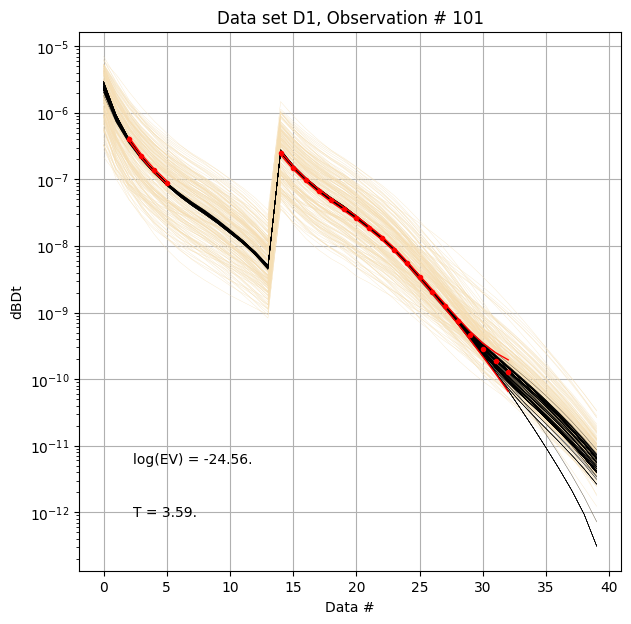

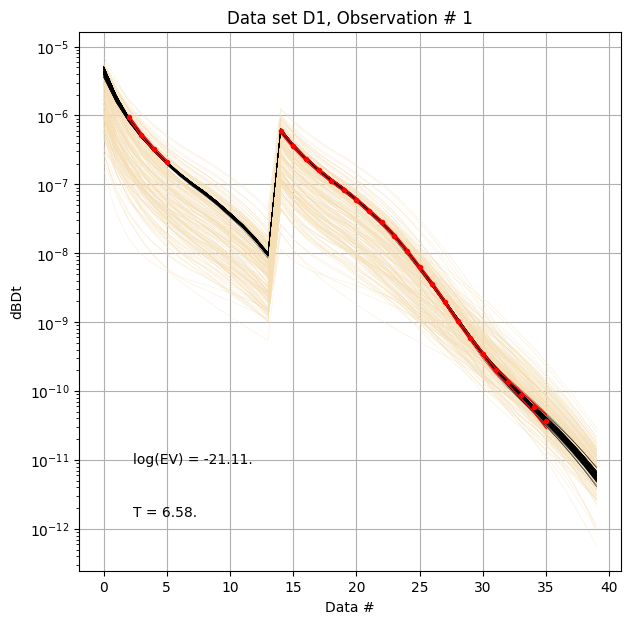

In [10]:
ig.plot_data_prior_post(f_post_h5, i_plot=100,hardcopy=hardcopy)
ig.plot_data_prior_post(f_post_h5, i_plot=0,hardcopy=hardcopy)

### Evidence and Temperature

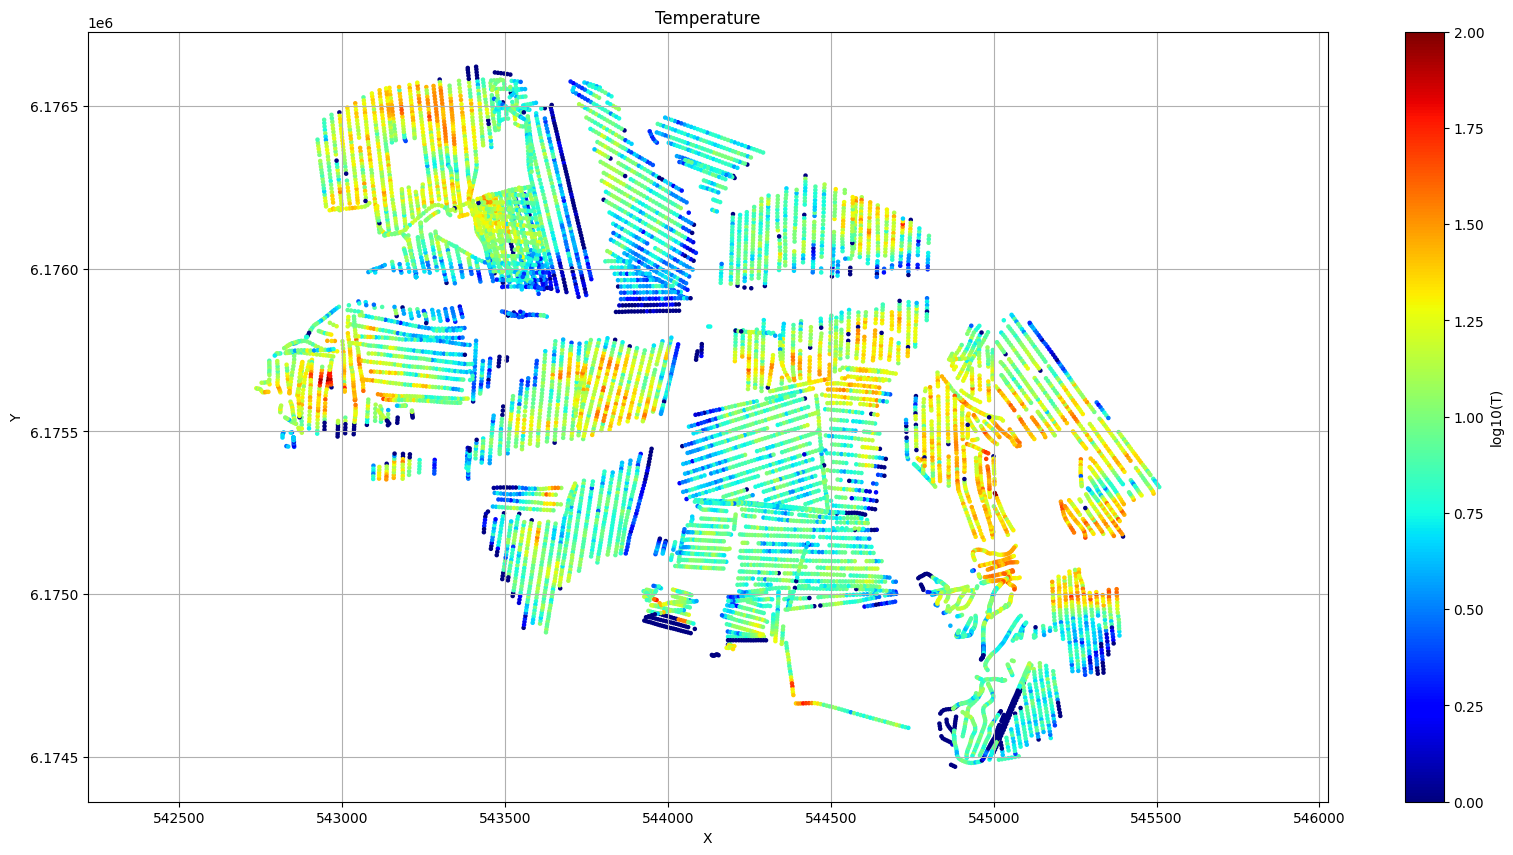

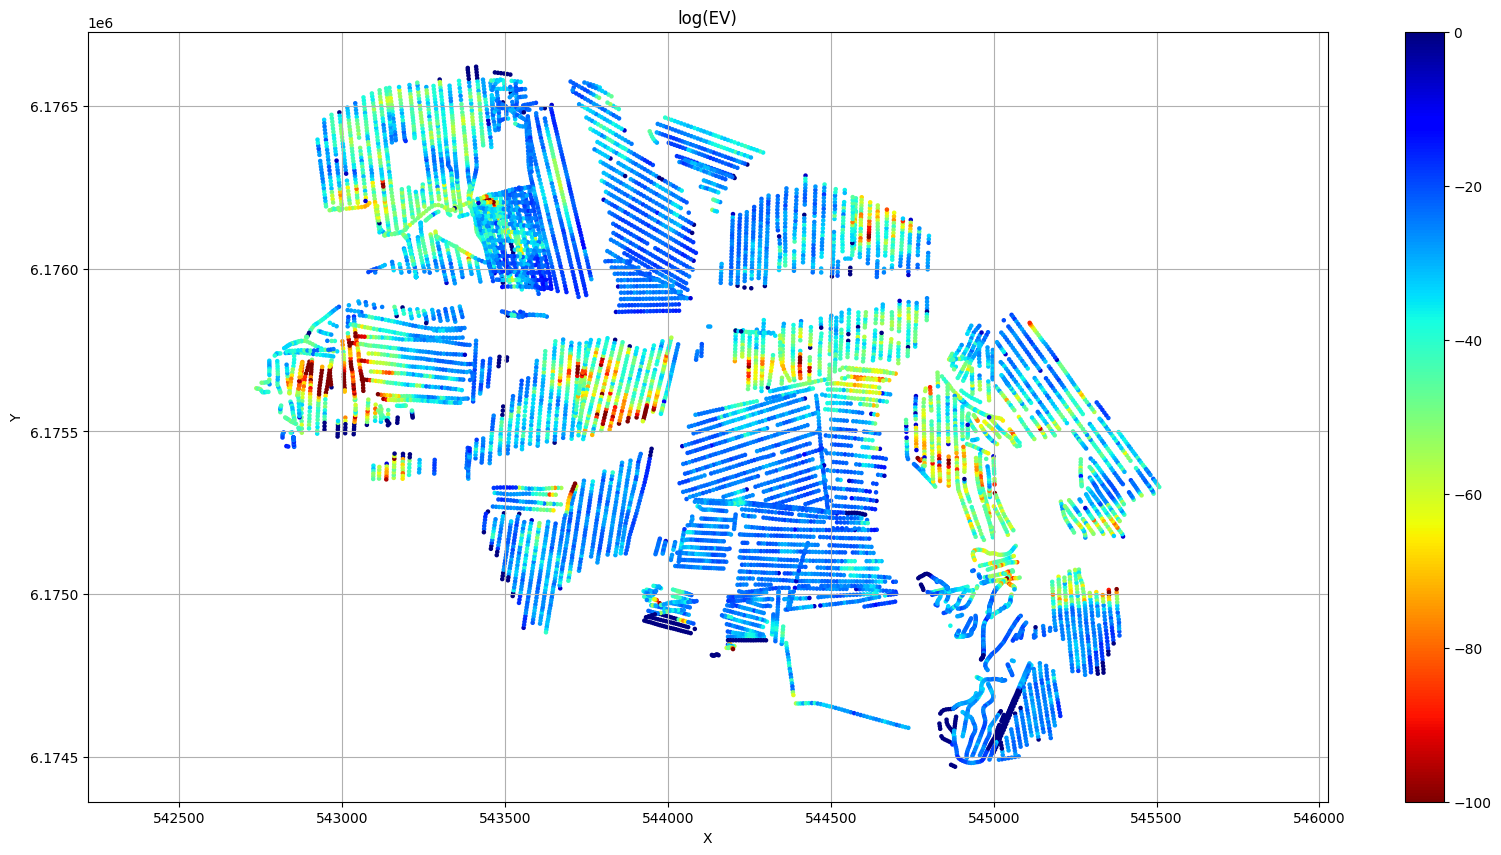

In [11]:
# Plot the Temperature used for inversion
ig.plot_T_EV(f_post_h5, pl='T',hardcopy=hardcopy)
# Plot the evidence (prior likelihood) estimated as part of inversion
ig.plot_T_EV(f_post_h5, pl='EV',hardcopy=hardcopy)

### Profile

Plot a profile of posterior statistics of model parameters 1 (resistivity)

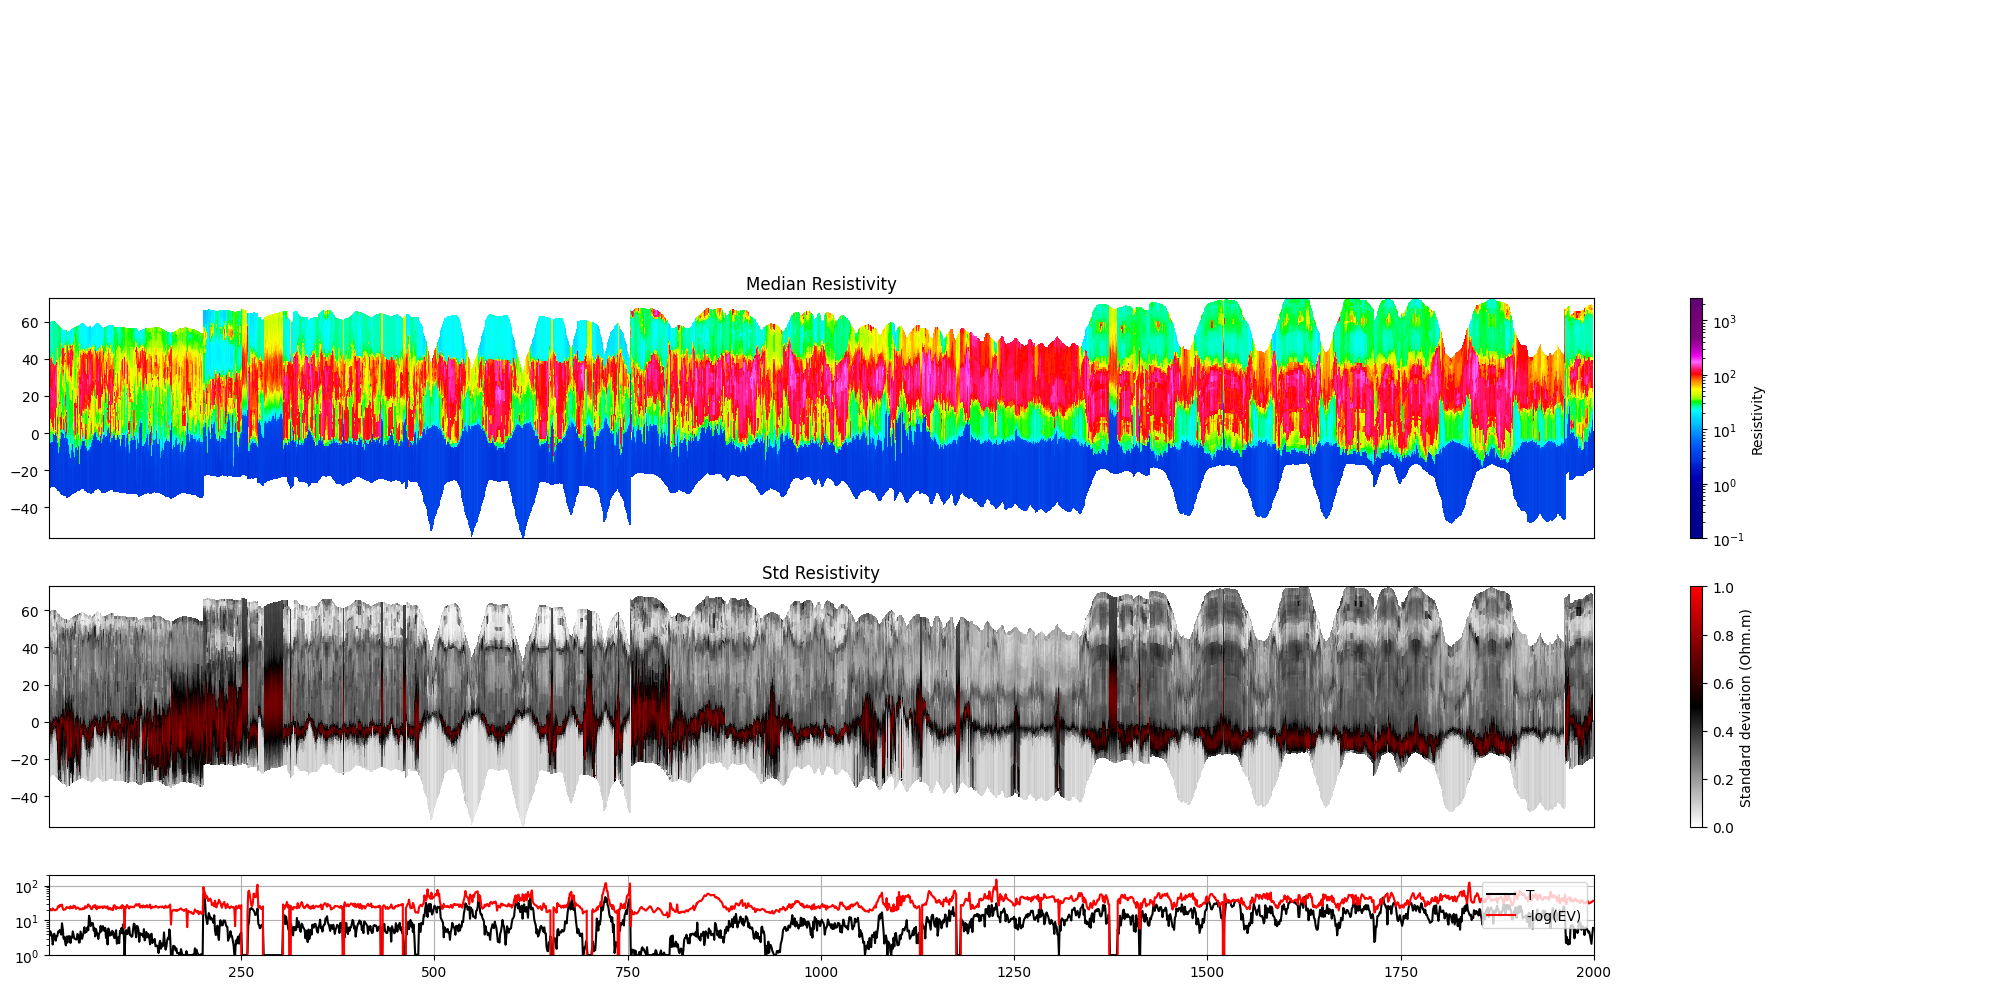

In [12]:
ig.plot_profile(f_post_h5, i1=1, i2=2000, im=1, hardcopy=hardcopy)

### Plot 2d Features

First plot the median resistivity in layers 5, 30, and 50

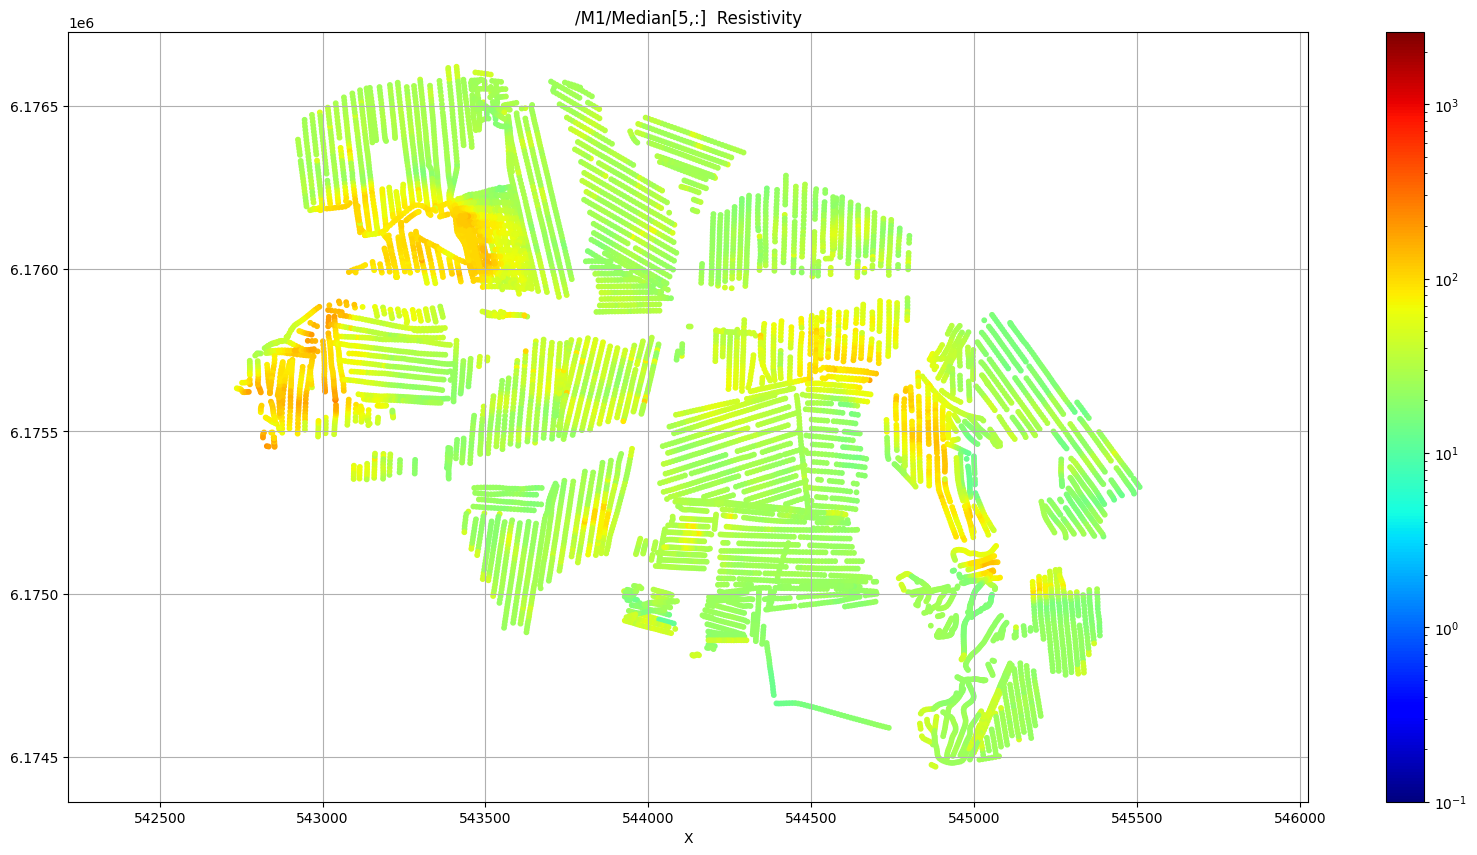

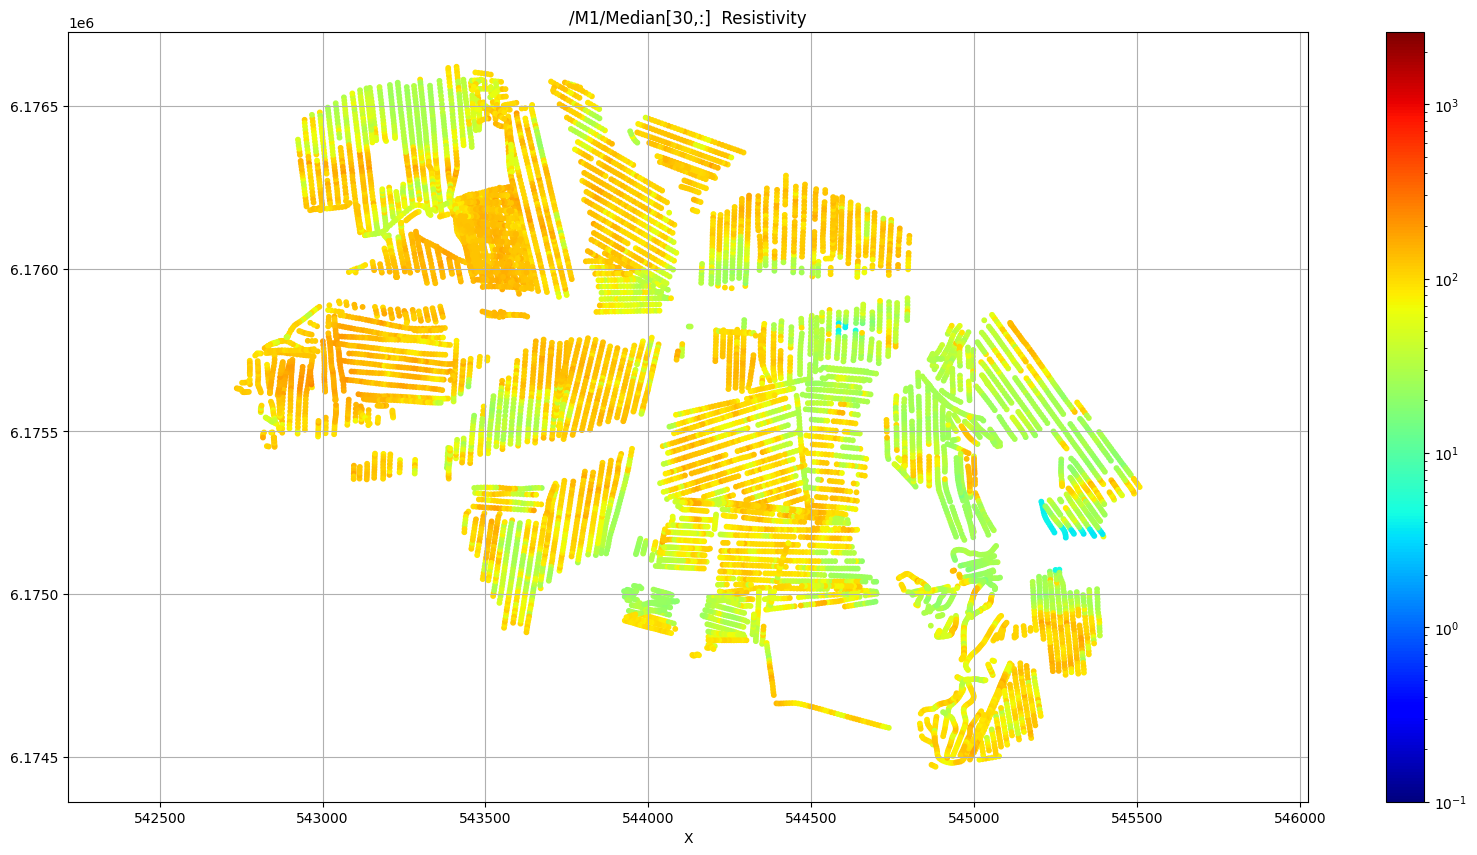

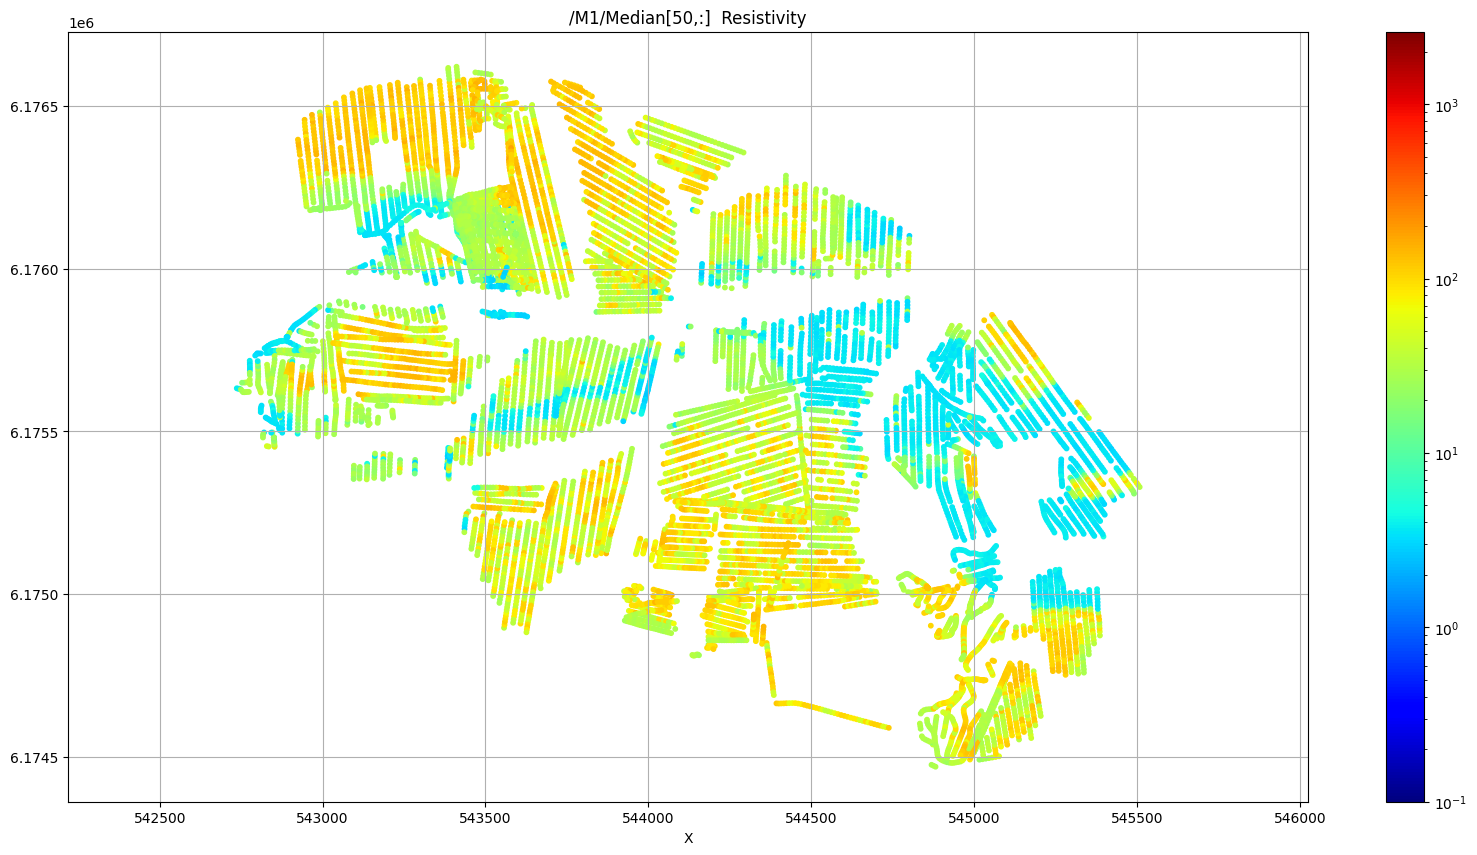

In [13]:

# Plot a 2D feature: Resistivity in layer 10
try:
    ig.plot_feature_2d(f_post_h5,im=1,iz=5, key='Median', uselog=1, cmap='jet', s=10,hardcopy=hardcopy)
    plt.show()
except:
    pass

try:
    ig.plot_feature_2d(f_post_h5,im=1,iz=30, key='Median', uselog=1, cmap='jet', s=10,hardcopy=hardcopy)
    plt.show()
except:
    pass

try:
    ig.plot_feature_2d(f_post_h5,im=1,iz=50, key='Median', uselog=1, cmap='jet', s=10,hardcopy=hardcopy)
    plt.show()
except:
    pass

## Export to CSV format

In [14]:
f_csv, f_point_csv = ig.post_to_csv(f_post_h5)

Writing to POST_M1.csv


----------------------------------------------------
Creating point data set: Median


Creating point data set: Mean


Creating point data set: Std


- saving to : POST_M1_point.csv


In [15]:
# Read the CSV file
#f_point_csv = 'POST_DAUGAARD_AVG_PRIOR_CHI2_NF_3_log-uniform_N100000_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu100000_aT1_M1_point.csv'
import pandas as pd
df = pd.read_csv(f_point_csv)
df.head()

X          Y      Z   LINE     Median       Mean       Std
0  543822.9  6176069.6  58.32  140.0  19.292850  21.258892  0.153587
1  543822.9  6176069.6  57.32  140.0  18.307146  19.500961  0.111120
2  543822.9  6176069.6  56.32  140.0  18.256956  17.928635  0.057242
3  543822.9  6176069.6  55.32  140.0  19.493780  19.180571  0.068433
4  543822.9  6176069.6  54.32  140.0  20.258331  22.119009  0.080783

In [16]:
# Use Pyvista to plot X,Y,Z,Median
plPyVista = False
if plPyVista:
    import pyvista as pv
    import numpy as np
    from pyvista import examples
    #pv.set_jupyter_backend('client')
    pv.set_plot_theme("document")
    p = pv.Plotter(notebook=True)
    p = pv.Plotter()
    filtered_df = df[(df['Median'] < 50) | (df['Median'] > 200)]
    #filtered_df = df[(df['LINE'] > 1000) & (df['LINE'] < 1400) ]
    points = filtered_df[['X', 'Y', 'Z']].values[:]
    median = np.log10(filtered_df['Mean'].values[:])
    opacity = np.where(filtered_df['Median'].values[:] < 100, 0.5, 1.0)
    #p.add_points(points, render_points_as_spheres=True, point_size=3, scalars=median, cmap='jet', opacity=opacity)
    p.add_points(points, render_points_as_spheres=True, point_size=6, scalars=median, cmap='hot')
    p.show_grid()
    p.show()